#imp

In [ ]:
import pandas as pd
pd.set_option("max_colwidth", 160)
pd.set_option("display.max_columns", None)

import numpy as np
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")



def load_data(file_path, indx = True, indx_col = 0):
  '''Parameters:
  file_path: path to your excel or csv file with data,

  indx: boolean - whether there is index column in your file (usually it is the first column) --> *by default it is set to True

  indx_col: int - if your file has an index column, specify column number here --> *by default it is equal to 0 (first column)
  '''
  if indx == True and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path)

  elif indx == True and file_path.endswith(".csv"):
    data = pd.read_csv(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".csv"):
    data = pd.read_csv(file_path)
  return data


In [ ]:
from statistics import mean, stdev
from math import sqrt
from sklearn import metrics

def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = np.mean(d1), np.mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

In [ ]:
#!pip install scipy --upgrade
from scipy.stats import ttest_rel, ttest_ind, mannwhitneyu, wilcoxon

#load data

In [ ]:
df = load_data('/content/res1_wyniki.xlsx', indx=False)
df.shape

(399, 23)

In [ ]:
df = load_data('/content/res1_up.csv', indx=False)
df.shape

(395, 20)

In [ ]:
df.head()

,kod,komunikat,bon,płeć,wiek,tryb,rok,waznosc,Nastroj1,Nastroj2,indeks_przychylności,wynik_ogólny,nastroj_diff,Nastroj1_mapped,komunikat_mapped,Nastroj1_komunikat_congruence,Nastroj1_komunikat_congruence_abs,plec_komunikat_bon,komunikat_bon,Nastroj1_komunikat_congruence_komunikat
0,OER01,0,1,1,19,1,1,4,3,3,4.0,4.0000,0,3,3,0,0,k_0_1,0_1,0_0
1,EMJ05,0,1,1,20,1,1,1,3,3,4.0,2.3750,0,3,3,0,0,k_0_1,0_1,0_0
2,MAP06,0,1,1,19,1,1,1,3,2,3.5,4.0625,-1,3,3,0,0,k_0_1,0_1,0_0
3,AGK04,0,1,1,20,1,1,3,4,4,4.0,3.6250,0,5,3,2,2,k_0_1,0_1,2_0
4,PJZ05,0,1,1,19,1,1,3,4,4,4.0,3.8750,0,5,3,2,2,k_0_1,0_1,2_0


In [ ]:
df['Nastroj1_3cat'] = df.Nastroj1.map({3:0, 1:2, 2:2}).fillna(1)
df['Nastroj2_3cat'] = df.Nastroj2.map({3:0, 1:2, 2:2}).fillna(1)

df['waznosc_3cat'] = df.waznosc.map({3:0, 1:2, 2:2}).fillna(1)

In [ ]:
df['nastroj_diff_3cat'] = df['Nastroj2_3cat'] - df['Nastroj1_3cat']

In [ ]:
df['nastroj_diff_3cat'].value_counts()

 0.0    264
 1.0     38
-1.0     37
-2.0     29
 2.0     27
Name: nastroj_diff_3cat, dtype: int64

In [ ]:
df['Nastroj1_3cat'].value_counts()

0.0    143
1.0    142
2.0    110
Name: Nastroj1_3cat, dtype: int64

In [ ]:
df['Nastroj2_3cat'].value_counts()

0.0    154
1.0    123
2.0    118
Name: Nastroj2_3cat, dtype: int64

In [ ]:
df['waznosc_3cat'].value_counts()

1.0    199
2.0    102
0.0     94
Name: waznosc_3cat, dtype: int64

In [ ]:
df = df.dropna(axis=1)

In [ ]:
kods = ['KJA09', 'XX60', 'XX72', 'X204']

In [ ]:
df = df[ ~(df['kod osoby'].isin(kods) ) ]
df.shape

(395, 21)

In [ ]:
df['nastroj_diff'] = df['Nastroj 2'] - df['Nastroj 1']

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'indeks_przychylności', 'wynik_ogólny',
       'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'Nastroj1_3cat',
       'Nastroj2_3cat', 'waznosc_3cat', 'nastroj_diff_3cat'],
      dtype='object')

#Analizy

In [ ]:
df['typ komunikatu'] = df['typ komunikatu'].str.strip()

In [ ]:
df['typ komunikatu'] = df['typ komunikatu'].map({'neutralny':0, 'negatywny':2, 'pozytywny':1})
df['płeć'] = df['płeć'].map({'k':1, 'm':2, 'inna':3, 'wnp':0})
df['tryb studiów'] = df['tryb studiów'].map({"S":1, "NS":2})

In [ ]:
df['tryb studiów'].unique()

array(['S', 'NS'], dtype=object)

In [ ]:
cols_pas = ['PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9']

In [ ]:
df.to_csv('/content/exp-1st_res.csv', index=False)

In [ ]:
df['typ komunikatu'].value_counts()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

neutralny    134
negatywny    133
pozytywny    132
Name: typ komunikatu, dtype: int64

In [ ]:
df.bon.value_counts()

0    202
1    197
Name: bon, dtype: int64

In [ ]:
pd.DataFrame(df.groupby('bon')['typ komunikatu'].value_counts())

typ komunikatu
bon typ komunikatu                
0   negatywny                   69
    neutralny                   67
    pozytywny                   66
1   neutralny                   67
    pozytywny                   66
    negatywny                   64

In [ ]:
df.płeć.value_counts(normalize=True).round(3)*100

k       78.4
m       19.3
inna     1.8
wnp      0.5
Name: płeć, dtype: float64

In [ ]:
df.płeć.value_counts()

k       313
m        77
inna      7
wnp       2
Name: płeć, dtype: int64

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'indeks_przychylności', 'wynik_ogólny',
       'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'Nastroj1_3cat',
       'Nastroj2_3cat', 'waznosc_3cat', 'nastroj_diff_3cat',
       'Nastroj1_komunikat_congruence_3cat'],
      dtype='object')

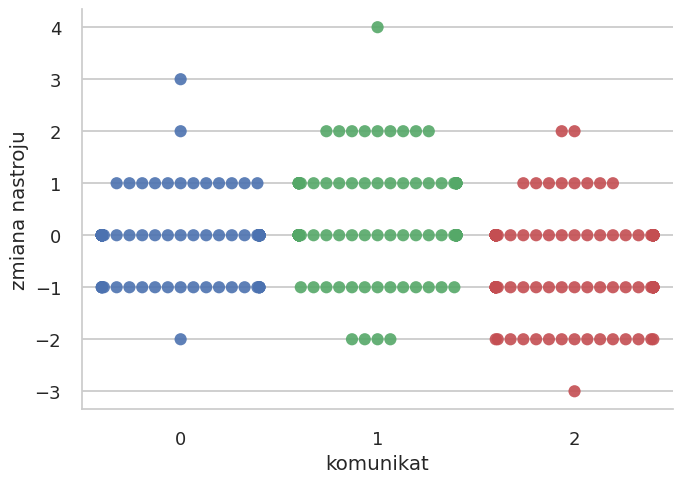

In [ ]:
g = sns.catplot(kind = 'swarm', data = df, x = 'komunikat', y = 'nastroj_diff', hue = 'komunikat',
            palette = ['b', 'g', 'r'], aspect=1.4, s=77, alpha=0.9, )
g.set(ylabel = 'zmiana nastroju', xlabel = 'komunikat')
plt.show()

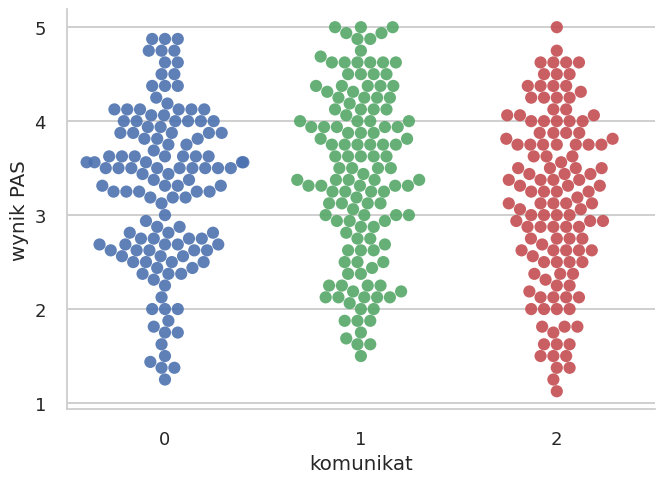

In [ ]:
g = sns.catplot(kind = 'swarm', data = df, x = 'komunikat', y = 'wynik_ogólny', hue = 'komunikat',
            palette = ['b', 'g', 'r'], aspect=1.4, s=77, alpha=0.9, )
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', xlabel = 'komunikat')
plt.show()

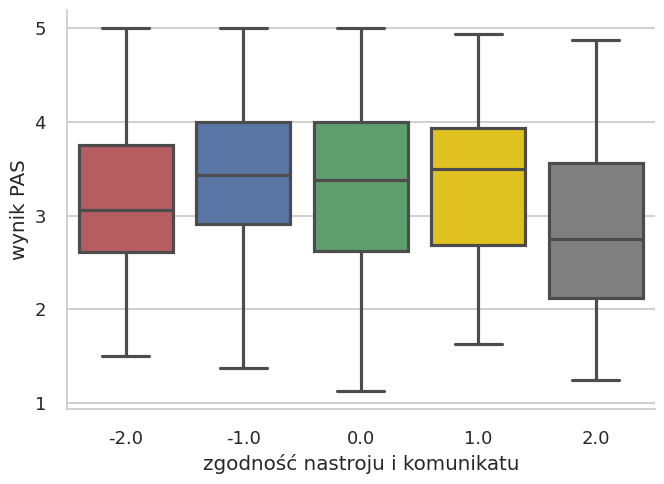

In [ ]:
g = sns.catplot(kind = 'box', data = df, x = 'Nastroj1_komunikat_congruence_3cat', y = 'wynik_ogólny', hue = 'Nastroj1_komunikat_congruence_3cat',
            palette = ['r', 'b', 'g', 'gold', 'grey'], aspect=1.4, dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', xlabel = 'zgodność nastroju i komunikatu')
plt.show()

In [ ]:
#df.waznosc_3cat = df.waznosc_3cat.map({0:'neutral', 1:'high', 2:'low'})

df.waznosc_3cat = df.waznosc_3cat.map({0:'neutralna', 1:'wysoka', 2:'niska'})

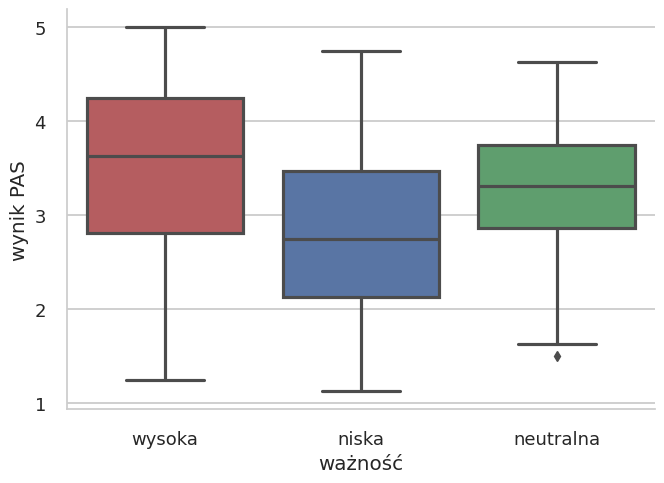

In [ ]:
g = sns.catplot(kind = 'box', data = df, x = 'waznosc_3cat', y = 'wynik_ogólny', hue = 'waznosc_3cat',
            palette = ['r', 'b', 'g'], aspect=1.4, dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', xlabel = 'ważność')
plt.show()

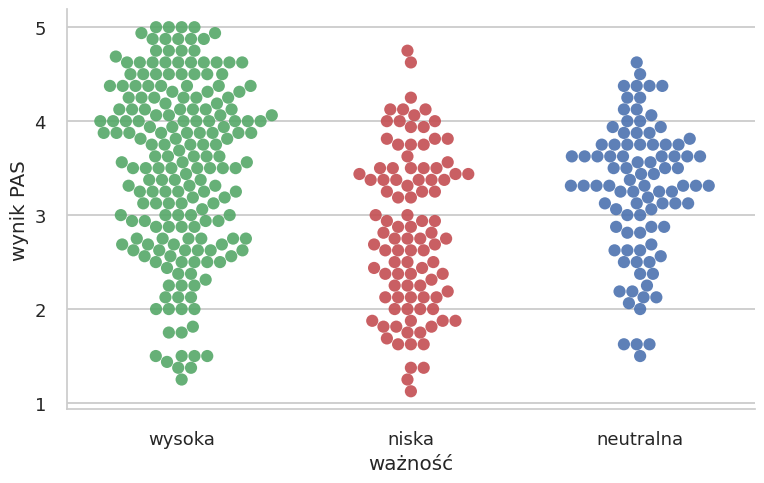

In [ ]:
g = sns.catplot(kind = 'swarm', data = df, x = 'waznosc_3cat', y = 'wynik_ogólny', hue = 'waznosc_3cat',
            palette = ['g', 'r', 'b'], s=77, alpha=0.9, aspect=1.6)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', xlabel = 'ważność')
plt.show()

In [ ]:
df['rok studiów'].value_counts()

1    203
4    196
Name: rok studiów, dtype: int64

In [ ]:
df['rok studiów'].value_counts(normalize=True).round(3)*100

1    50.9
4    49.1
Name: rok studiów, dtype: float64

In [ ]:
df.groupby('rok studiów')['osobista waznosc egzaminu'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
rok studiów,,,,,,,,
1,203.0,3.13,1.2,1.0,2.0,3.0,4.0,5.0
4,196.0,3.67,1.3,1.0,3.0,4.0,5.0,5.0


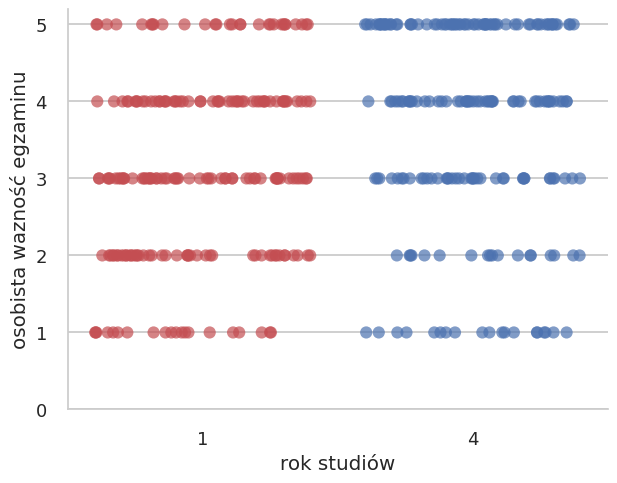

In [ ]:
g = sns.catplot(kind = 'strip', data = df, x = 'rok studiów', y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], s=77, alpha=0.7, jitter = 0.4, aspect=1.3)
g.set(yticks=[0,1,2,3,4,5], ylabel = 'osobista wazność egzaminu')
plt.show()

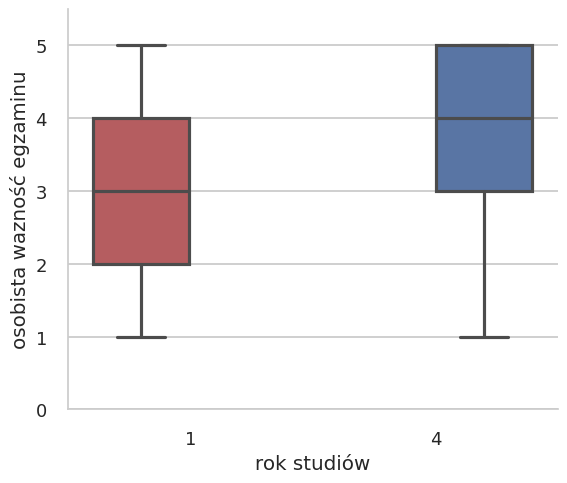

In [ ]:
g = sns.catplot(kind = 'box', data = df, x = 'rok studiów', y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], aspect=1.2)
g.set(yticks=[0,1,2,3,4,5], ylabel = 'osobista wazność egzaminu', ylim=(0,5.5))
plt.show()

In [ ]:
df.columns

Index(['kod osoby', 'typ komunikatu', 'bon', 'płeć', 'wiek', 'tryb studiów',
       'rok studiów', 'osobista waznosc egzaminu', 'Nastroj 1', 'Nastroj 2',
       'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5', 'PAS 6', 'PAS 7', 'PAS 8',
       'PAS 9', 'indeks przychylności', 'wynik ogólny', 'nastroj_diff'],
      dtype='object')

In [ ]:
df[df['wynik ogólny'] > 5]

,kod osoby,typ komunikatu,bon,płeć,wiek,tryb studiów,rok studiów,osobista waznosc egzaminu,Nastroj 1,Nastroj 2,PAS 1,PAS 2,PAS 3,PAS 4,PAS 5,PAS 6,PAS 7,PAS 8,PAS 9,indeks przychylności,wynik ogólny,nastroj_diff
18,KJA09,neutralny,1,k,41,NS,1,3,5,5,3,3,5,1,99,3,3,3,4,3.0,15.125,0
147,XX60,neutralny,0,k,20,S,1,5,4,4,5,5,5,3,99,5,1,4,5,5.0,16.375,0
356,X204,neutralny,0,k,26,NS,4,5,1,1,1,1,1,1,99,1,5,1,1,1.0,13.250,0


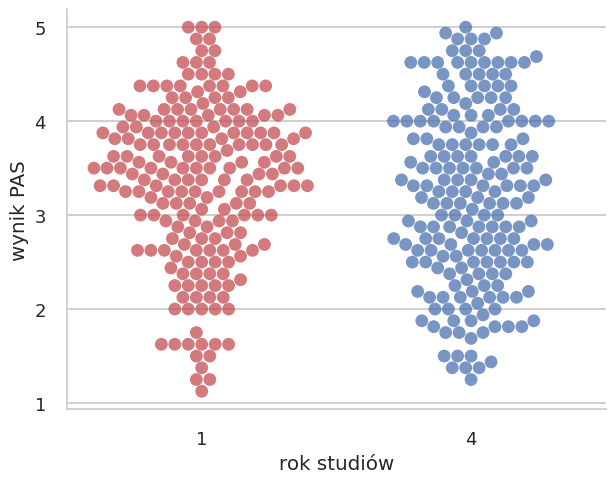

In [ ]:
g = sns.catplot(kind = 'swarm', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], s=85, alpha=0.75, aspect=1.3)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
plt.show()

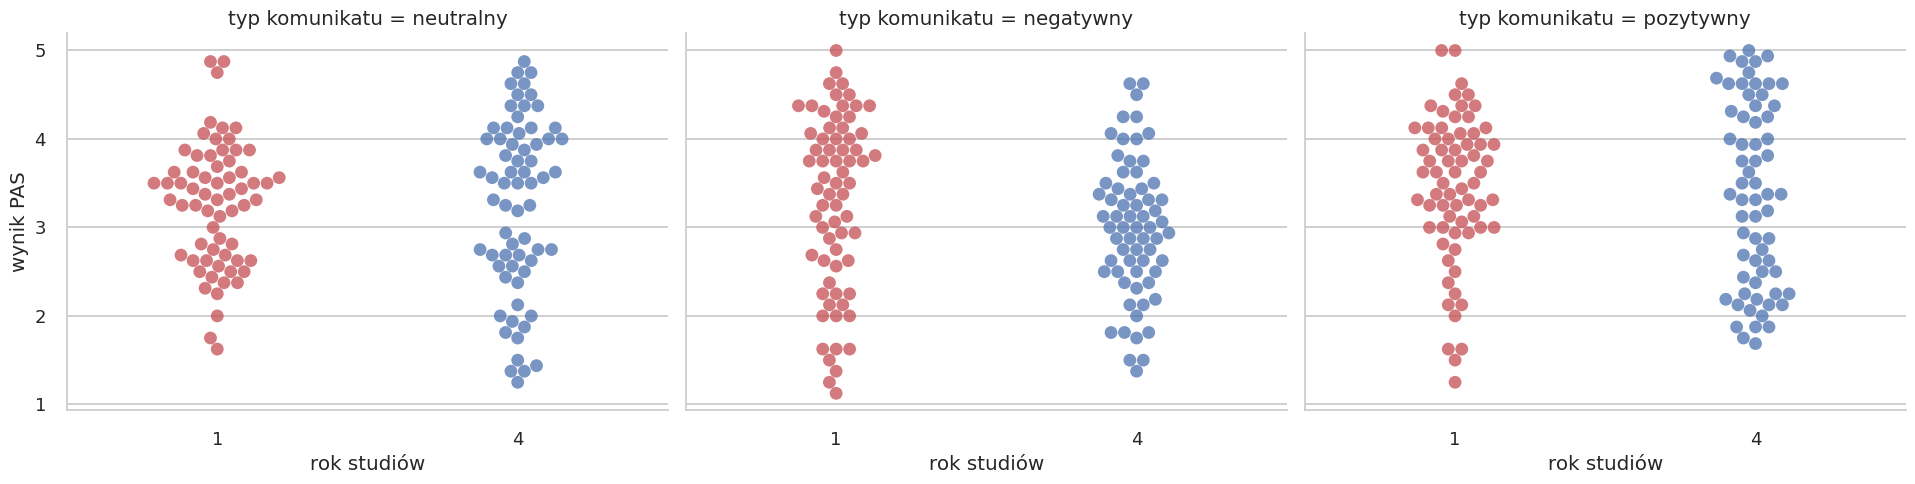

In [ ]:
g = sns.catplot(kind = 'swarm', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], s=85, alpha=0.75, aspect=1.3, col = 'typ komunikatu', dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
plt.show()

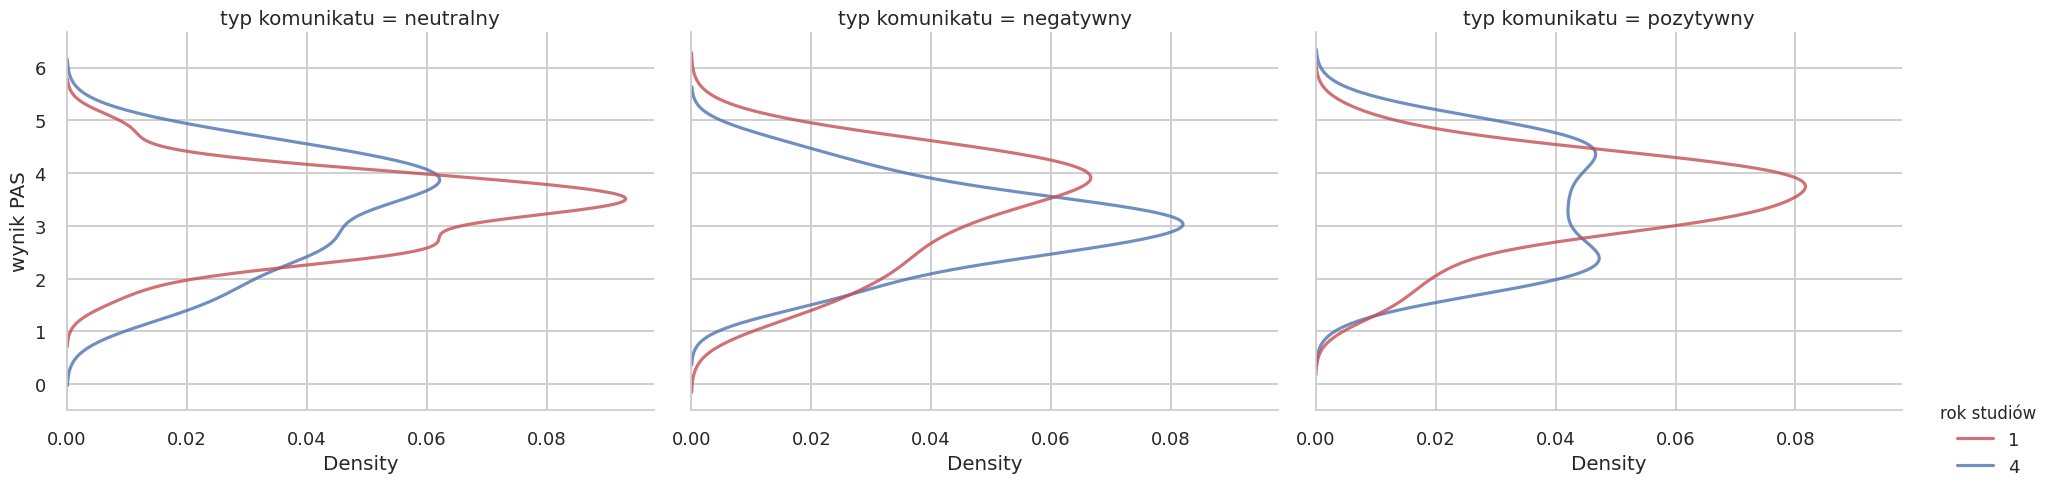

In [ ]:
g = sns.displot(data = df[df['wynik ogólny'] < 6], y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], alpha = 0.8, kind="kde", aspect=1.3, col = 'typ komunikatu')
g.set(ylabel = 'wynik PAS')
sns.move_legend(g, loc = 'lower right')
plt.show()

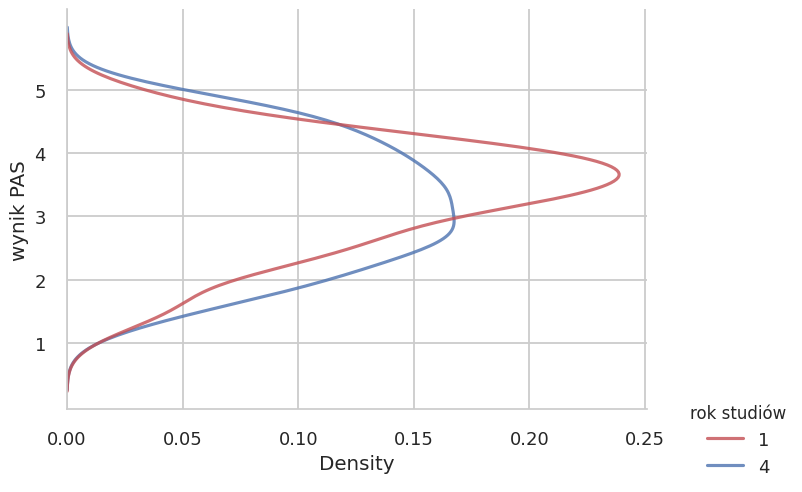

In [ ]:
g = sns.displot(data = df[df['wynik ogólny'] < 6], y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], alpha = 0.8, kind="kde", aspect=1.4)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
sns.move_legend(g, loc = 'lower right')
plt.show()

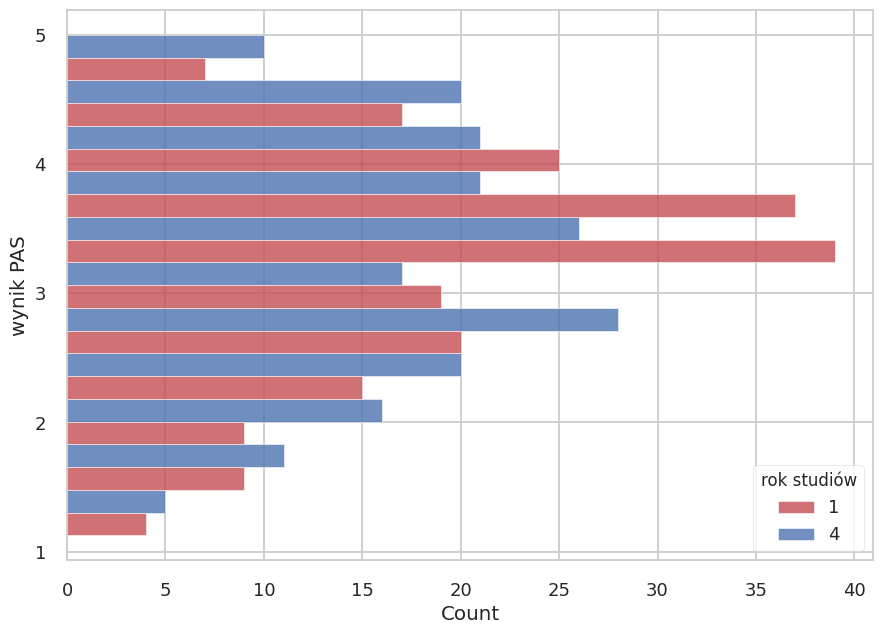

In [ ]:
g = sns.histplot(data = df[df['wynik ogólny'] < 6], y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="dodge", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
sns.move_legend(g, loc = 'lower right')
plt.show()

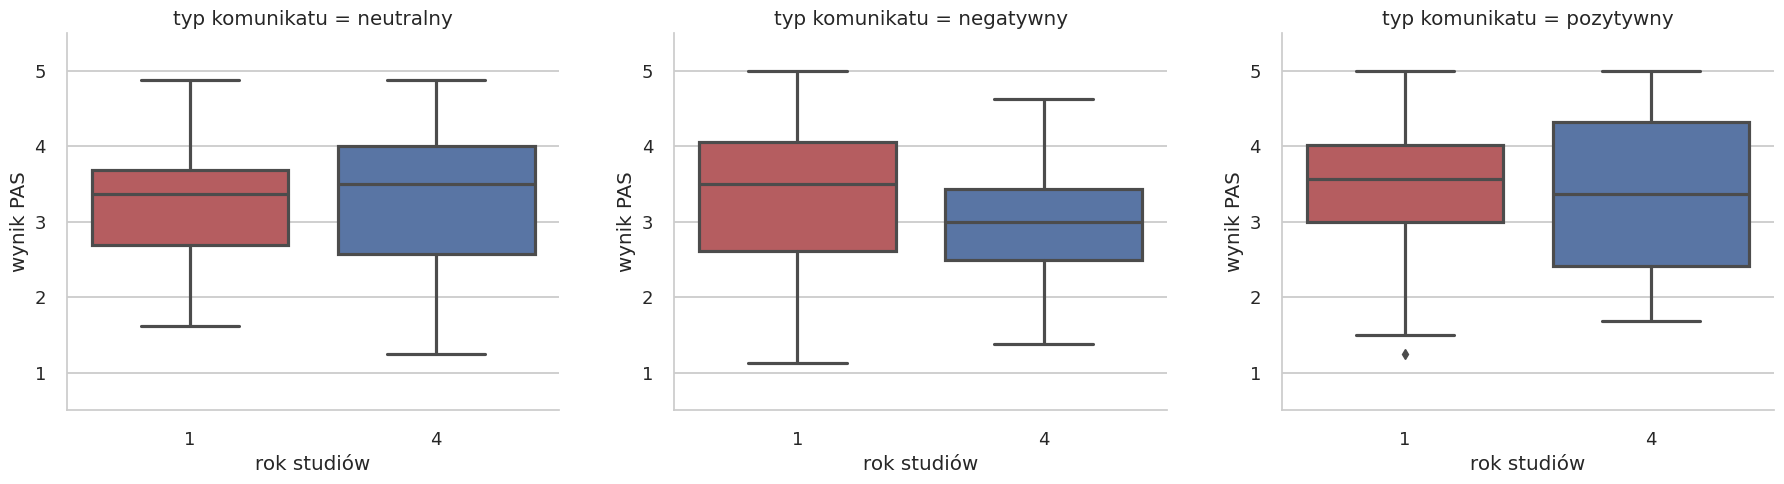

In [ ]:
g = sns.catplot(kind = 'box', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], aspect=1.2, col = 'typ komunikatu', sharey=False, dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', ylim=(0.5,5.5))
plt.tight_layout(w_pad=3.5)
plt.show()

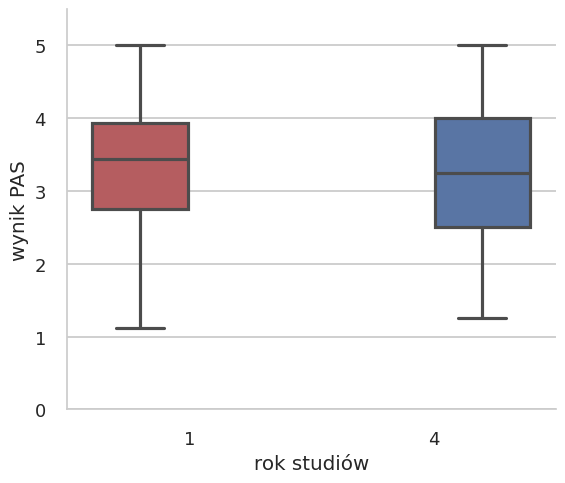

In [ ]:
g = sns.catplot(kind = 'box', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], aspect=1.2)
g.set(yticks=[0,1,2,3,4,5], ylabel = 'wynik PAS', ylim=(0,5.5))
plt.show()

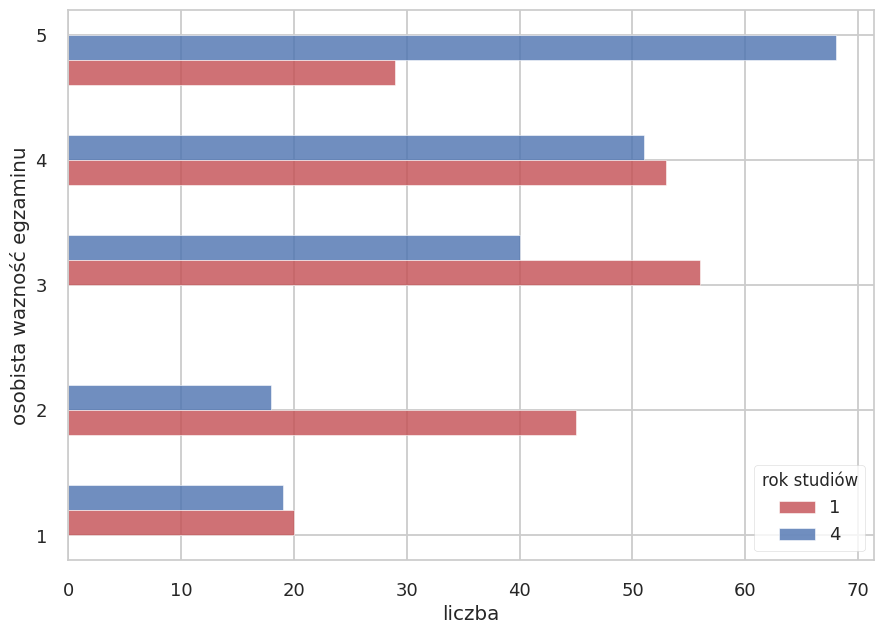

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="dodge", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'osobista wazność egzaminu', xlabel = 'liczba')
sns.move_legend(g, loc = 'lower right')
plt.show()

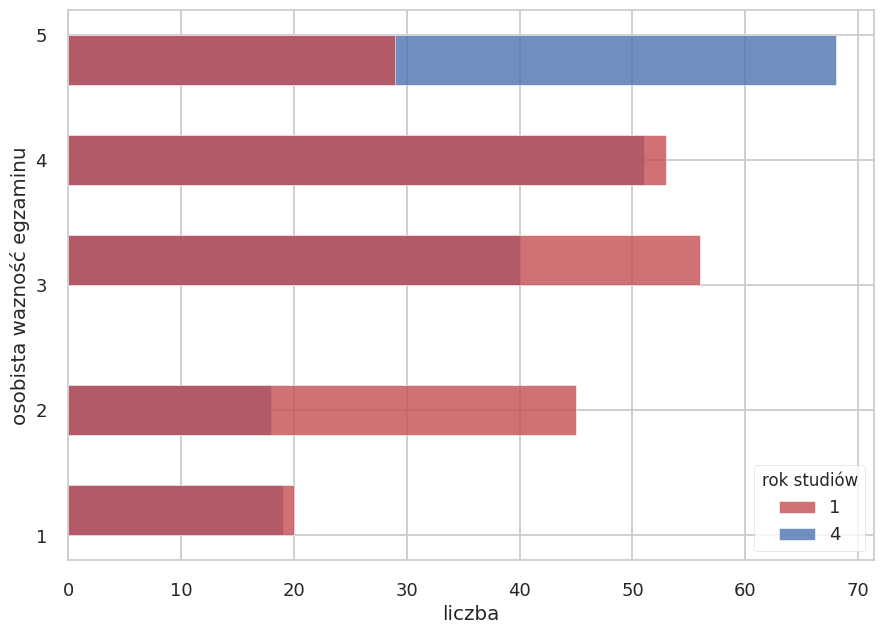

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="layer", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'osobista wazność egzaminu', xlabel = 'liczba')
sns.move_legend(g, loc = 'lower right')
plt.show()

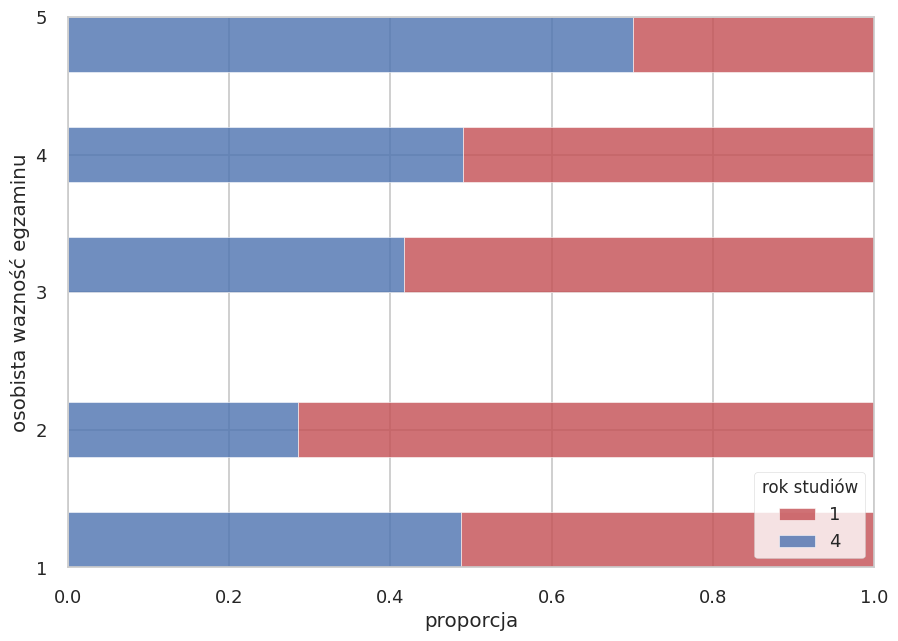

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="fill", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'osobista wazność egzaminu', xlabel = 'proporcja')
sns.move_legend(g, loc = 'lower right')
plt.show()

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="dodge", alpha = 0.8,)
#g.set(yticks=[0,1,2,3,4,5], ylabel = 'osobista wazność egzaminu', ylim=(0,5.5))
plt.show()

In [ ]:
df['tryb studiów'].value_counts()

NS    202
S     197
Name: tryb studiów, dtype: int64

In [ ]:
df['osobista waznosc egzaminu'].describe().round(2)

count    399.00
mean       3.63
std        4.95
min        1.00
25%        2.00
50%        4.00
75%        4.00
max       99.00
Name: osobista waznosc egzaminu, dtype: float64

In [ ]:
df.wiek.describe().round(2)

count    399.00
mean      23.67
std        7.46
min       18.00
25%       20.00
50%       22.00
75%       24.00
max       99.00
Name: wiek, dtype: float64

In [ ]:
df['Nastroj 1'].describe().round(2)

count    399.00
mean       3.07
std        1.00
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        5.00
Name: Nastroj 1, dtype: float64

In [ ]:
df['Nastroj 2'].describe().round(2)

count    399.00
mean       2.99
std        1.00
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        5.00
Name: Nastroj 2, dtype: float64

In [ ]:
df.groupby(['płeć'])['Nastroj 1'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
płeć,,,,,,,,
inna,7.0,3.29,0.76,2.0,3.00,3.0,4.00,4.0
k,313.0,3.03,1.02,1.0,2.00,3.0,4.00,5.0
m,77.0,3.23,0.94,1.0,3.00,3.0,4.00,5.0
wnp,2.0,2.50,2.12,1.0,1.75,2.5,3.25,4.0


In [ ]:
df.groupby(['płeć'])['typ komunikatu'].value_counts()

płeć  typ komunikatu
inna  negatywny           4
      neutralny           2
      pozytywny           1
k     neutralny         110
      negatywny         103
      pozytywny         100
m     pozytywny          31
      negatywny          24
      neutralny          22
wnp   negatywny           2
Name: typ komunikatu, dtype: int64

In [ ]:
df.groupby( ['typ komunikatu'] ).płeć.value_counts()

typ komunikatu  płeć
negatywny       k       103
                m        24
                inna      4
                wnp       2
neutralny       k       110
                m        22
                inna      2
pozytywny       k       100
                m        31
                inna      1
Name: płeć, dtype: int64

In [ ]:
df.groupby(['typ komunikatu'])['Nastroj 2'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
typ komunikatu,,,,,,,,
negatywny,133.0,2.72,1.03,1.0,2.0,3.0,3.0,5.0
neutralny,134.0,2.94,0.96,1.0,2.0,3.0,4.0,5.0
pozytywny,132.0,3.30,0.94,1.0,3.0,3.0,4.0,5.0


In [ ]:
df[df['wynik ogólny'] > 5]['indeks przychylności'].describe().round(2)

count    3.0
mean     3.0
std      2.0
min      1.0
25%      2.0
50%      3.0
75%      4.0
max      5.0
Name: indeks przychylności, dtype: float64

In [ ]:
df[df['wynik ogólny'] > 5]['wynik ogólny'].describe().round(2)

count     3.00
mean     14.92
std       1.57
min      13.25
25%      14.19
50%      15.12
75%      15.75
max      16.38
Name: wynik ogólny, dtype: float64

In [ ]:
df['typ komunikatu'].unique()

array(['neutralny', 'negatywny', 'pozytywny'], dtype=object)

##kolumny

In [ ]:
df.columns = ['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb',
       'rok', 'waznosc', 'Nastroj1', 'Nastroj2',
       'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5', 'PAS 6', 'PAS 7', 'PAS 8',
       'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff']
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff'],
      dtype='object')

In [ ]:
df.Nastroj1.unique()

array([3, 4, 1, 2, 5])

In [ ]:
df['Nastroj1_mapped'] = df.Nastroj1.map({3:3, 1:1, 2:1, 5:5, 4:5})
df['komunikat_mapped'] = df.komunikat.map({0:3, 1:5, 2:1})

df['Nastroj1_komunikat_congruence'] = df['Nastroj1_mapped'] - df['komunikat_mapped']
df['Nastroj1_komunikat_congruence'].value_counts()

 0    145
 2     84
-2     74
 4     52
-4     40
Name: Nastroj1_komunikat_congruence, dtype: int64

In [ ]:
df['Nastroj1_komunikat_congruence_2'] = df['Nastroj1'] - df['komunikat_mapped']
df['Nastroj1_komunikat_congruence_2'].value_counts()

 0    72
 1    65
-1    65
-2    52
 2    49
 3    44
-3    31
-4     9
 4     8
Name: Nastroj1_komunikat_congruence_2, dtype: int64

In [ ]:
df['Nastroj1_komunikat_congruence_abs'] = df['Nastroj1_komunikat_congruence_2'].apply(lambda x: np.abs(x))
df['Nastroj1_komunikat_congruence_abs'].value_counts()

1    130
2    101
3     75
0     72
4     17
Name: Nastroj1_komunikat_congruence_abs, dtype: int64

In [ ]:
p3_pos = df[ df['typ komunikatu'] == 'pozytywny']
p3_neu = df[ df['typ komunikatu'] == 'neutralny']
p3_neg = df[ df['typ komunikatu'] == 'negatywny']

In [ ]:
p3_pos = df[ df['komunikat'] == 1]
p3_neu = df[ df['komunikat'] == 0]
p3_neg = df[ df['komunikat'] == 2]

In [ ]:
df.columns

In [ ]:
dyfer_przed = {'Nastroj1'}

dyfer_po = {'Nastroj2'}

In [ ]:
cc = [('Nastroj1', 'Nastroj2')]

##t-test



In [ ]:
df.head(2)

,kod,komunikat,bon,płeć,wiek,tryb,rok,waznosc,Nastroj1,Nastroj2,PAS 1,PAS 2,PAS 3,PAS 4,PAS 5,PAS 6,PAS 7,PAS 8,PAS 9,indeks_przychylności,wynik_ogólny,nastroj_diff,Nastroj1_mapped,komunikat_mapped,Nastroj1_komunikat_congruence,Nastroj1_komunikat_congruence_abs
0,OER01,0,1,1,19,1,1,4,3,3,5,4,5,3,3,4,2,4,4,4.0,4.000,0,3,3,0,0
1,EMJ05,0,1,1,20,1,1,1,3,3,2,2,2,1,3,4,2,3,2,4.0,2.375,0,3,3,0,0


In [ ]:
df.wiek.describe().round(1)

count    399.0
mean      23.7
std        7.5
min       18.0
25%       20.0
50%       22.0
75%       24.0
max       99.0
Name: wiek, dtype: float64

In [ ]:
df.loc[df.wiek == 99, 'wiek']

In [ ]:
df.loc[df.wiek == 99, 'wiek'] = 24

In [ ]:
df[df['rok studiów'] == 1]['osobista waznosc egzaminu'].describe().round(1)

count    203.0
mean       3.6
std        6.8
min        1.0
25%        2.0
50%        3.0
75%        4.0
max       99.0
Name: osobista waznosc egzaminu, dtype: float64

In [ ]:
df.loc[df['osobista waznosc egzaminu'] == 99, 'osobista waznosc egzaminu'] = 3

In [ ]:
df.drop(columns=cols_pas).to_csv('res1_up.csv', index= False)

###bon

In [ ]:
#mannwhitneyu


for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.bon == 0][d].values
  p2 = df[df.bon == 1][d].values
  print(d)

  value, p = mannwhitneyu(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")

    print('t: ', value.round(3), 'p-value: ', p.round(4), "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
17946.0 0.1514 

Nastroj2
do NOT reject H0
17510.0 0.0659 

nastroj_diff
do NOT reject H0
19346.0 0.8751 

wynik_ogólny
do NOT reject H0
20273.0 0.4969 



In [ ]:

for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.bon == 0][d].values
  p2 = df[df.bon == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.2726502536733204 0.2039 

Nastroj2
do NOT reject H0
-1.4644468836893578 0.1439 

nastroj_diff
do NOT reject H0
-0.224210387720696 0.8227 

wynik_ogólny
do NOT reject H0
0.6885550183474333 0.4915 



In [ ]:
for c in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['bon'],
                          alpha=0.05)
  #display results
  print(tukey)

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1276 0.2039 -0.0695 0.3246  False
---------------------------------------------------
Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1466 0.1439 -0.0502 0.3434  False
---------------------------------------------------
nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.019 0.8227 -0.1478 0.1858  False
---------------------------------------------------
wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.06

In [ ]:
for c in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df['płeć'].isin([1,2])][c],
                          groups = df[df['płeć'].isin([1,2])]['płeć'],
                          alpha=0.05)
  #display results
  print(tukey)

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2143 0.0914 -0.0347 0.4634  False
---------------------------------------------------
Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   0.3926 0.002 0.1446 0.6405   True
-------------------------------------------------
nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1782 0.0971 -0.0325 0.3889  False
---------------------------------------------------
wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    0.199 0.080

In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 1) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.0210006810568617 0.3081 

Nastroj2
do NOT reject H0
-1.0510551347546973 0.2941 

nastroj_diff
do NOT reject H0
-0.04426417548161178 0.9647 

wynik_ogólny
do NOT reject H0
0.8584212540727312 0.3913 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 2) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-0.2679029102363685 0.7895 

Nastroj2
do NOT reject H0
-0.6764990808250534 0.5008 

nastroj_diff
do NOT reject H0
-0.42546945998113334 0.6717 

wynik_ogólny
do NOT reject H0
0.6703100637330884 0.5047 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 0) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.4006394227719123 0.1629 

Nastroj2
reject H0
t:  -2.229 p-value:  0.0269 effect size:  -0.4 

nastroj_diff
do NOT reject H0
-0.8627390828631805 0.3894 

wynik_ogólny
do NOT reject H0
-1.2719663114059616 0.2049 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 1) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-0.9997240130235726 0.3187 

Nastroj2
reject H0
t:  -2.175 p-value:  0.0309 effect size:  -0.39 

nastroj_diff
do NOT reject H0
-1.5599225543001665 0.1205 

wynik_ogólny
do NOT reject H0
-1.1993319953499033 0.2319 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 1) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 0) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-0.6859951432250676 0.4936 

Nastroj2
do NOT reject H0
-1.4252252916018504 0.1557 

nastroj_diff
do NOT reject H0
-0.9213484946643352 0.358 

wynik_ogólny
do NOT reject H0
-1.9236098573711755 0.0559 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.7358321375617711 0.0842 

Nastroj2
reject H0
t:  -3.04 p-value:  0.0027 effect size:  -0.55 

nastroj_diff
do NOT reject H0
-1.420764409820166 0.157 

wynik_ogólny
do NOT reject H0
-0.571789197874758 0.5681 



In [ ]:
df['plec_komunikat_bon'] = df.płeć.map({1:'k',2:'m'}).fillna('inna') + "_"+df.komunikat.astype('str')+'_'+df.bon.astype('str')
df['plec_komunikat_bon'].value_counts()

k_0_1       55
k_2_0       55
k_0_0       52
k_1_1       50
k_1_0       49
k_2_1       48
m_1_0       16
m_1_1       15
m_2_1       13
m_0_0       12
m_2_0       11
m_0_1       10
inna_2_1     3
inna_2_0     3
inna_1_1     1
inna_0_1     1
inna_0_0     1
Name: plec_komunikat_bon, dtype: int64

In [ ]:
df['komunikat_bon'] = df.komunikat.astype('str')+'_'+df.bon.astype('str')
df['komunikat_bon'].value_counts()

2_0    69
0_1    66
1_1    66
1_0    65
0_0    65
2_1    64
Name: komunikat_bon, dtype: int64

In [ ]:
cc2 = ['indeks_przychylności', 'wynik_ogólny', 'nastroj_diff', 'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'Nastroj1_komunikat_congruence_2', 'Nastroj2', 'Nastroj1']

df[cc2] = df[cc2].astype('float')

In [ ]:
df.groupby('komunikat').Nastroj2.mean().round(2)

komunikat
0    2.93
1    3.30
2    2.72
Name: Nastroj2, dtype: float64

In [ ]:
df.groupby('bon').Nastroj2.mean().round(2)

bon
0    2.91
1    3.06
Name: Nastroj2, dtype: float64

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(bon)+C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                                                          sum_sq     df  \
C(komunikat)                                              0.0000    2.0   
C(bon)                                                       NaN    1.0   
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)  775.2382   50.0   
Residual                                                164.8948  365.0   

                                                              F  PR(>F)  
C(komunikat)                                             0.0000     1.0  
C(bon)                                                      NaN     NaN  
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)  34.3203     0.0  
Residual                                                    NaN     NaN  
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.545
Method: 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 29
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local

                                                          sum_sq     df  \
C(komunikat)                                              0.0000    2.0   
C(bon)                                                       NaN    1.0   
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)  760.0313   50.0   
Residual                                                261.4091  365.0   

                                                              F  PR(>F)  
C(komunikat)                                             0.0000  0.9999  
C(bon)                                                      NaN     NaN  
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)  21.2243  0.0000  
Residual                                                    NaN     NaN  
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.102
Method:          

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_2)+C(komunikat):C(Nastroj1_komunikat_congruence_2)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon'],
      dtype='object')

In [ ]:
df.groupby(['Nastroj1_komunikat_congruence', 'komunikat']).Nastroj2.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence,komunikat,Nastroj2
0,-4,1,2.65
1,-2,0,1.85
2,-2,1,3.15
3,0,0,3.02
4,0,1,3.92
5,0,2,1.94
6,2,0,3.74
7,2,2,2.64
8,4,2,3.33


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence_2', 'komunikat']).Nastroj2.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_2,komunikat,Nastroj2
0,-4,1,2.33
1,-3,1,2.74
2,-2,0,1.42
3,-2,1,3.15
4,-1,0,2.09
5,-1,1,3.79
6,0,0,3.02
7,0,1,4.62
8,0,2,1.67
9,1,0,3.66


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence_abs', 'komunikat']).Nastroj2.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_abs,komunikat,Nastroj2
0,0,0,3.02
1,0,1,4.62
2,0,2,1.67
3,1,0,3.05
4,1,1,3.79
5,1,2,2.00
6,2,0,2.19
7,2,1,3.15
8,2,2,2.64
9,3,1,2.74


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence', 'komunikat']).nastroj_diff.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence,komunikat,nastroj_diff
0,-4,1,0.88
1,-2,0,0.21
2,-2,1,0.15
3,0,0,0.02
4,0,1,-0.24
5,0,2,0.11
6,2,0,-0.36
7,2,2,-0.36
8,4,2,-0.83


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence_2', 'komunikat']).nastroj_diff.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_2,komunikat,nastroj_diff
0,-4,1,1.33
1,-3,1,0.74
2,-2,0,0.42
3,-2,1,0.15
4,-1,0,0.09
5,-1,1,-0.21
6,0,0,0.02
7,0,1,-0.38
8,0,2,0.67
9,1,0,-0.34


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence_abs', 'komunikat']).nastroj_diff.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_abs,komunikat,nastroj_diff
0,0,0,0.02
1,0,1,-0.38
2,0,2,0.67
3,1,0,-0.18
4,1,1,-0.21
5,1,2,0.00
6,2,0,0.19
7,2,1,0.15
8,2,2,-0.36
9,3,1,0.74


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence', 'komunikat']).wynik_ogólny.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence,komunikat,wynik_ogólny
0,-4,1,3.32
1,-2,0,2.81
2,-2,1,3.56
3,0,0,3.47
4,0,1,3.39
5,0,2,2.96
6,2,0,3.34
7,2,2,3.13
8,4,2,3.29


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence_2', 'komunikat']).wynik_ogólny.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_2,komunikat,wynik_ogólny
0,-4,1,2.70
1,-3,1,3.50
2,-2,0,2.40
3,-2,1,3.56
4,-1,0,3.04
5,-1,1,3.40
6,0,0,3.47
7,0,1,3.32
8,0,2,3.46
9,1,0,3.35


In [ ]:
df.groupby(['Nastroj1_komunikat_congruence_abs', 'komunikat']).wynik_ogólny.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_abs,komunikat,wynik_ogólny
0,0,0,3.47
1,0,1,3.32
2,0,2,3.46
3,1,0,3.23
4,1,1,3.40
5,1,2,2.86
6,2,0,2.62
7,2,1,3.56
8,2,2,3.13
9,3,1,3.50


In [ ]:
df['Nastroj1_komunikat_congruence_komunikat'] = df.Nastroj1_komunikat_congruence.astype('str') + "_" + df.komunikat.astype('str')
df['Nastroj1_komunikat_congruence_komunikat'].value_counts()

0_0     58
4_2     52
0_1     51
2_2     45
-4_1    40
-2_1    40
2_0     39
0_2     36
-2_0    34
Name: Nastroj1_komunikat_congruence_komunikat, dtype: int64

In [ ]:
df['Nastroj1_komunikat_congruence_2_komunikat'] = df.Nastroj1_komunikat_congruence_2.astype('str') + "_" + df.komunikat.astype('str')
df['Nastroj1_komunikat_congruence_2_komunikat'].value_counts()

0_0     58
2_2     45
3_2     44
-1_1    43
-2_1    40
1_0     35
-3_1    31
1_2     30
-1_0    22
-2_0    12
-4_1     9
4_2      8
0_1      8
0_2      6
2_0      4
Name: Nastroj1_komunikat_congruence_2_komunikat, dtype: int64

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_2)+C(komunikat):C(Nastroj1_komunikat_congruence_2)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                                                   sum_sq     df        F  \
C(komunikat)                                      -0.0000    2.0  -0.0000   
C(Nastroj1_komunikat_congruence_2)               362.3320    8.0  90.4222   
C(komunikat):C(Nastroj1_komunikat_congruence_2)  300.4208   16.0  37.4859   
Residual                                         185.8299  371.0      NaN   

                                                 PR(>F)  
C(komunikat)                                        1.0  
C(Nastroj1_komunikat_congruence_2)                  0.0  
C(komunikat):C(Nastroj1_komunikat_congruence_2)     0.0  
Residual                                            NaN  
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     28.53

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence)+C(komunikat):C(Nastroj1_komunikat_congruence)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                                                 sum_sq     df         F  \
C(komunikat)                                     0.0000    2.0    0.0000   
C(Nastroj1_komunikat_congruence)               280.5866    4.0  119.5223   
C(komunikat):C(Nastroj1_komunikat_congruence)  200.2442    8.0   42.6493   
Residual                                       221.2582  377.0       NaN   

                                               PR(>F)  
C(komunikat)                                      1.0  
C(Nastroj1_komunikat_congruence)                  0.0  
C(komunikat):C(Nastroj1_komunikat_congruence)     0.0  
Residual                                          NaN  
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     35.07
Date:         

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/l

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_2)+C(komunikat):C(Nastroj1_komunikat_congruence_2)+C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                                                          sum_sq     df  \
C(komunikat)                                                 NaN    2.0   
C(Nastroj1_komunikat_congruence_2)                        0.0000    8.0   
C(komunikat):C(Nastroj1_komunikat_congruence_2)         342.6935   16.0   
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)   41.5180   27.0   
Residual                                                162.7643  356.0   

                                                              F  PR(>F)  
C(komunikat)                                                NaN     NaN  
C(Nastroj1_komunikat_congruence_2)                       0.0000     1.0  
C(komunikat):C(Nastroj1_komunikat_congruence_2)         46.8464     0.0  
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)   3.3633     0.0  
Residual                                                    NaN     NaN  
                            OLS Regression Results                            
Dep. Variable:   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
/usr/loca

                                                          sum_sq     df  \
C(komunikat)                                                 NaN    2.0   
C(Nastroj1_komunikat_congruence_2)                       -0.0000    8.0   
C(komunikat):C(Nastroj1_komunikat_congruence_2)         148.1088   16.0   
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)   41.5180   27.0   
Residual                                                162.7643  356.0   

                                                              F  PR(>F)  
C(komunikat)                                                NaN     NaN  
C(Nastroj1_komunikat_congruence_2)                      -0.0000     1.0  
C(komunikat):C(Nastroj1_komunikat_congruence_2)         20.2466     0.0  
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence_2)   3.3633     0.0  
Residual                                                    NaN     NaN  
                            OLS Regression Results                            
Dep. Variable:           n

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence)+C(komunikat):C(Nastroj1_komunikat_congruence)+C(komunikat):C(bon):C(Nastroj1_komunikat_congruence)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                                                        sum_sq     df  \
C(komunikat)                                            0.0000    2.0   
C(Nastroj1_komunikat_congruence)                        0.0000    4.0   
C(komunikat):C(Nastroj1_komunikat_congruence)         133.4439    8.0   
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence)   37.1564   15.0   
Residual                                              198.9643  368.0   

                                                            F  PR(>F)  
C(komunikat)                                           0.0000     1.0  
C(Nastroj1_komunikat_congruence)                       0.0000     1.0  
C(komunikat):C(Nastroj1_komunikat_congruence)         30.8519     0.0  
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence)   4.5816     0.0  
Residual                                                  NaN     NaN  
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/usr/local/

                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.950
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           8.70e-05
Time:                        10:08:25   Log-Likelihood:                -479.65
No. Observations:                 386   AIC:                             995.3
Df Residuals:                     368   BIC:                             1067.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence)+C(komunikat):C(Nastroj1_komunikat_congruence)+C(komunikat):C(bon):C(Nastroj1_komunikat_congruence)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                                                        sum_sq     df  \
C(komunikat)                                            0.0000    2.0   
C(Nastroj1_komunikat_congruence)                        0.0000    4.0   
C(komunikat):C(Nastroj1_komunikat_congruence)         133.4439    8.0   
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence)   37.1564   15.0   
Residual                                              198.9643  368.0   

                                                            F  PR(>F)  
C(komunikat)                                           0.0000     1.0  
C(Nastroj1_komunikat_congruence)                       0.0000     1.0  
C(komunikat):C(Nastroj1_komunikat_congruence)         30.8519     0.0  
C(komunikat):C(bon):C(Nastroj1_komunikat_congruence)   4.5816     0.0  
Residual                                                  NaN     NaN  
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/usr/local/

In [ ]:
df.groupby('Nastroj1_komunikat_congruence_komunikat').Nastroj2.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_komunikat,Nastroj2
0,-2_0,1.85
1,-2_1,3.15
2,-4_1,2.65
3,0_0,3.02
4,0_1,3.92
5,0_2,1.94
6,2_0,3.74
7,2_2,2.64
8,4_2,3.33


In [ ]:
df.groupby('Nastroj1_komunikat_congruence_2_komunikat').Nastroj2.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_2_komunikat,Nastroj2
0,-1_0,2.09
1,-1_1,3.79
2,-2_0,1.42
3,-2_1,3.15
4,-3_1,2.74
5,-4_1,2.33
6,0_0,3.02
7,0_1,4.62
8,0_2,1.67
9,1_0,3.66


In [ ]:
df.groupby('Nastroj1_komunikat_congruence_komunikat').nastroj_diff.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_komunikat,nastroj_diff
0,-2_0,0.21
1,-2_1,0.15
2,-4_1,0.88
3,0_0,0.02
4,0_1,-0.24
5,0_2,0.11
6,2_0,-0.36
7,2_2,-0.36
8,4_2,-0.83


In [ ]:
df.groupby('Nastroj1_komunikat_congruence_2_komunikat').nastroj_diff.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_2_komunikat,nastroj_diff
0,-1_0,0.09
1,-1_1,-0.21
2,-2_0,0.42
3,-2_1,0.15
4,-3_1,0.74
5,-4_1,1.33
6,0_0,0.02
7,0_1,-0.38
8,0_2,0.67
9,1_0,-0.34


In [ ]:
df.groupby('Nastroj1_komunikat_congruence_komunikat').wynik_ogólny.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_komunikat,wynik_ogólny
0,-2_0,2.81
1,-2_1,3.56
2,-4_1,3.32
3,0_0,3.47
4,0_1,3.39
5,0_2,2.96
6,2_0,3.34
7,2_2,3.13
8,4_2,3.29


In [ ]:
df.groupby('Nastroj1_komunikat_congruence_2_komunikat').wynik_ogólny.mean().round(2).reset_index()

,Nastroj1_komunikat_congruence_2_komunikat,wynik_ogólny
0,-1_0,3.04
1,-1_1,3.40
2,-2_0,2.40
3,-2_1,3.56
4,-3_1,3.50
5,-4_1,2.70
6,0_0,3.47
7,0_1,3.32
8,0_2,3.46
9,1_0,3.35


In [ ]:
#Nastroj1_komunikat_congruence_2_komunikat

for c in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_2_komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n***********************************\n')

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -1_0   -1_1   1.6998    0.0  1.0686   2.331   True
  -1_0   -2_0  -0.6742 0.3316 -1.5384  0.1899  False
  -1_0   -2_1   1.0591    0.0  0.4199  1.6983   True
  -1_0   -3_1    0.651 0.0682 -0.0203  1.3223  False
  -1_0   -4_1   0.2424 0.9999 -0.7104  1.1952  False
  -1_0    0_0   0.9263    0.0  0.3234  1.5293   True
  -1_0    0_1   2.5341    0.0  1.5399  3.5283   True
  -1_0    0_2  -0.4242 0.9933 -1.5333  0.6848  False
  -1_0    1_0   1.5662    0.0  0.9111  2.2214   True
  -1_0    1_2  -0.0909    1.0 -0.7668   0.585  False
  -1_0    2_0   2.4091    0.0  1.1002   3.718   True
  -1_0    2_2   0.5535 0.1519 -0.0729    1.18  False
  -1_0    3_2   0.9545    0.0  0.3258  1.5833   True
  -1_0    4_2   2.7841    0.0  1.7899  3.7783   True
  -1_1   -2_0   -2.374    0.0 -3.1602 -1.5879   True
  -1_1   -2_1  -0.6407 0.0039 -1.1697

In [ ]:
#Nastroj1_komunikat_congruence_komunikat

for c in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n***********************************\n')

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -2_0   -2_1   1.2971    0.0  0.7425  1.8516   True
  -2_0   -4_1   0.7971 0.0003  0.2425  1.3516   True
  -2_0    0_0   1.1643    0.0  0.6508  1.6778   True
  -2_0    0_1   2.0686    0.0  1.5422   2.595   True
  -2_0    0_2   0.0915 0.9999 -0.4771  0.6601  False
  -2_0    2_0   1.8906    0.0  1.3328  2.4485   True
  -2_0    2_2   0.7915 0.0002  0.2513  1.3317   True
  -2_0    4_2    1.474    0.0  0.9496  1.9983   True
  -2_1   -4_1     -0.5  0.084 -1.0316  0.0316  False
  -2_1    0_0  -0.1328 0.9953 -0.6214  0.3559  False
  -2_1    0_1   0.7716 0.0001  0.2694  1.2737   True
  -2_1    0_2  -1.2056    0.0 -1.7517 -0.6594   True
  -2_1    2_0   0.5936 0.0172  0.0586  1.1286   True
  -2_1    2_2  -0.5056 0.0606 -1.0222  0.0111  False
  -2_1    4_2   0.1769 0.9735 -0.3231  0.6769  False
  -4_1    0_0   0.3672 0.3182 -0.1214

In [ ]:
for c in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_2'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n***********************************\n')

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    -4     -3   0.4086 0.9681 -0.7116 1.5288  False
    -4     -2   0.4167 0.9525 -0.6514 1.4847  False
    -4     -1   0.8821 0.1837 -0.1701 1.9342  False
    -4      0     0.75 0.3839 -0.2959 1.7959  False
    -4      1    0.559 0.7721 -0.4932 1.6112  False
    -4      2   0.4626  0.917 -0.6103 1.5355  False
    -4      3   0.7121 0.5076 -0.3702 1.7944  False
    -4      4   2.5417    0.0  1.1041 3.9792   True
    -3     -2   0.0081    1.0 -0.6632 0.6794  False
    -3     -1   0.4734 0.3525 -0.1723 1.1192  False
    -3      0   0.3414 0.7611 -0.2941 0.9769  False
    -3      1   0.1504 0.9984 -0.4954 0.7961  False
    -3      2    0.054    1.0 -0.6249 0.7329  False
    -3      3   0.3035 0.9102 -0.3902 0.9972  False
    -3      4   2.1331    0.0  0.9599 3.3062   True
    -2     -1   0.4654 0.1746  -0.085 1.0158  False
   

In [ ]:
for c in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n***********************************\n')

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    -4     -2  -0.0959 0.9867 -0.6149  0.423  False
    -4      0    0.419 0.1092 -0.0533 0.8913  False
    -4      2   0.5048 0.0524 -0.0033 1.0128  False
    -4      4   0.6769 0.0082  0.1208 1.2331   True
    -2      0   0.5149  0.002  0.1371 0.8927   True
    -2      2   0.6007  0.001  0.1791 1.0223   True
    -2      4   0.7729 0.0001  0.2943 1.2514   True
     0      2   0.0858 0.9669 -0.2768 0.4484  False
     0      4    0.258 0.4639 -0.1695 0.6854  False
     2      4   0.1722 0.8502 -0.2945 0.6388  False
---------------------------------------------------

***********************************

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -4     -2  -0.6993    0.0 -1.0869 -0.3118   True


In [ ]:
for c in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_abs'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n***********************************\n')

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0295 0.9996 -0.4267 0.3677  False
     0      2  -0.3111 0.2471 -0.7281  0.106  False
     0      3  -0.1633 0.8538 -0.6095 0.2828  False
     0      4   0.4461 0.4496  -0.283 1.1752  False
     1      2  -0.2816 0.2006 -0.6402 0.0771  False
     1      3  -0.1338 0.8829 -0.5259 0.2582  False
     1      4   0.4756 0.3359 -0.2218 1.1729  False
     2      3   0.1477 0.8632 -0.2644 0.5599  False
     2      4   0.7571 0.0296  0.0483  1.466   True
     3      4   0.6094 0.1472 -0.1169 1.3357  False
---------------------------------------------------

***********************************

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1739 0.6076 -0.5069  0.159  False
    

In [ ]:
for dep in ['Nastroj1']:
  print(dep)
  model = ols(f"""{dep} ~ C(płeć)+C(płeć):C(bon)""", data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj1
                  sum_sq     df       F  PR(>F)
C(płeć)           2.8321    1.0  2.8578  0.0917
C(płeć):C(bon)    1.1203    2.0  0.5652  0.5687
Residual        378.5554  382.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               Nastroj1   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.329
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.264
Time:                        09:52:53   Log-Likelihood:                -543.95
No. Observations:                 386   AIC:                             1096.
Df Residuals:                     382   BIC:                             1112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
         

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(komunikat):C(bon)""", data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                       sum_sq     df        F  PR(>F)
C(komunikat)          22.8824    2.0  12.4342  0.0000
C(komunikat):C(bon)   13.3717    3.0   4.8441  0.0025
Residual             349.6527  380.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     7.880
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.47e-07
Time:                        09:58:46   Log-Likelihood:                -528.62
No. Observations:                 386   AIC:                             1069.
Df Residuals:                     380   BIC:                             1093.
Df Model:                           5                                         
Covariance Type:            nonrobust                           

In [ ]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(płeć)+C(komunikat)+C(komunikat):C(bon)+C(płeć):C(komunikat):C(bon)""", data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                               sum_sq     df        F  PR(>F)
C(płeć)                        7.2658    1.0   8.0856  0.0047
C(komunikat)                  21.3174    2.0  11.8613  0.0000
C(komunikat):C(bon)           12.7040    3.0   4.7124  0.0031
C(płeć):C(komunikat):C(bon)    6.3061    5.0   1.4035  0.2221
Residual                     336.0808  374.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     5.041
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.39e-07
Time:                        09:53:37   Log-Likelihood:                -520.98
No. Observations:                 386   AIC:                             1066.
Df Residuals:                     374   BIC:                      

In [ ]:
df.groupby(['komunikat']).Nastroj2.mean().round(2).reset_index()

,komunikat,Nastroj2
0,0,2.93
1,1,3.30
2,2,2.72


In [ ]:
df.groupby(['komunikat']).nastroj_diff.mean().round(2).reset_index()

,komunikat,nastroj_diff
0,0,-0.05
1,1,0.22
2,2,-0.41


In [ ]:
df.groupby(['komunikat']).wynik_ogólny.mean().round(2).reset_index()

,komunikat,wynik_ogólny
0,0,3.26
1,1,3.42
2,2,3.15


In [ ]:
df.groupby(['komunikat_bon']).Nastroj2.mean().round(2).reset_index()

,komunikat_bon,Nastroj2
0,0_0,2.91
1,0_1,2.95
2,1_0,3.43
3,1_1,3.17
4,2_0,2.42
5,2_1,3.05


In [ ]:
df.groupby(['komunikat_bon']).nastroj_diff.mean().round(2).reset_index()

,komunikat_bon,nastroj_diff
0,0_0,-0.09
1,0_1,0.00
2,1_0,0.49
3,1_1,-0.05
4,2_0,-0.64
5,2_1,-0.17


In [ ]:
df.groupby(['komunikat_bon']).wynik_ogólny.mean().round(2).reset_index()

,komunikat_bon,wynik_ogólny
0,0_0,3.39
1,0_1,3.14
2,1_0,3.58
3,1_1,3.26
4,2_0,2.97
5,2_1,3.34


In [ ]:
for c in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_bon'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n***********************************\n')

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0_0    0_1   0.0469 0.9998   -0.43  0.5237  False
   0_0    1_0   0.5231  0.023  0.0445  1.0017   True
   0_0    1_1    0.259 0.6284 -0.2178  0.7358  False
   0_0    2_0  -0.4874 0.0381  -0.959 -0.0158   True
   0_0    2_1   0.1392 0.9619 -0.3413  0.6197  False
   0_1    1_0   0.4762 0.0505 -0.0006   0.953  False
   0_1    1_1   0.2121 0.7964 -0.2629  0.6871  False
   0_1    2_0  -0.5343 0.0154  -1.004 -0.0645   True
   0_1    2_1   0.0923 0.9939 -0.3864   0.571  False
   1_0    1_1  -0.2641 0.6081 -0.7409  0.2127  False
   1_0    2_0  -1.0105    0.0 -1.4821 -0.5388   True
   1_0    2_1  -0.3839 0.2013 -0.8644  0.0966  False
   1_1    2_0  -0.7464 0.0001 -1.2162 -0.2766   True
   1_1    2_1  -0.1198 0.9799 -0.5985  0.3589  False
   2_0    2_1   0.6266 0.0024  0.1531  1.1001   True
-------------------------------------

In [ ]:
for c in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.płeć.isin([1,2])][c],
                          groups = df[df.płeć.isin([1,2])]['plec_komunikat_bon'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n***********************************\n')

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 k_0_0  k_0_1   0.0234    1.0 -0.6019 0.6488  False
 k_0_0  k_1_0   0.0962    1.0 -0.5475 0.7398  False
 k_0_0  k_1_1   0.1362 0.9999 -0.5042 0.7765  False
 k_0_0  k_2_0    0.078    1.0 -0.5474 0.7033  False
 k_0_0  k_2_1   0.3878 0.7128 -0.2593 1.0349  False
 k_0_0  m_0_0   0.5962 0.7626 -0.4392 1.6315  False
 k_0_0  m_0_1   0.1962    1.0 -0.9202 1.3125  False
 k_0_0  m_1_0  -0.1538    1.0 -1.0781 0.7704  False
 k_0_0  m_1_1   0.8962 0.0837 -0.0514 1.8437  False
 k_0_0  m_2_0   0.6416 0.7156 -0.4313 1.7145  False
 k_0_0  m_2_1  -0.1346    1.0 -1.1371 0.8679  False
 k_0_1  k_1_0   0.0727    1.0 -0.5624 0.7078  False
 k_0_1  k_1_1   0.1127    1.0  -0.519 0.7445  False
 k_0_1  k_2_0   0.0545    1.0  -0.562 0.6711  False
 k_0_1  k_2_1   0.3644  0.773 -0.2742  1.003  False
 k_0_1  m_0_0   0.5727 0.8013 -0.4573 1.6028  False
 k_

###rok/tryb - waznosc

In [ ]:
df.rok.unique(), df.tryb.unique()

(array([1, 4]), array([1, 2]))

In [ ]:
df.groupby('rok').waznosc.mean().round(2).reset_index()

,rok,waznosc
0,1,3.12
1,4,3.68


In [ ]:
df.groupby('rok').Nastroj1.mean().round(2).reset_index()

,rok,Nastroj1
0,1,3.29
1,4,2.83


In [ ]:
df.groupby('rok').Nastroj2.mean().round(2).reset_index()

,rok,Nastroj2
0,1,3.22
1,4,2.75


In [ ]:
df.groupby('rok').wynik_ogólny.mean().round(2).reset_index()

,rok,wynik_ogólny
0,1,3.34
1,4,3.22


In [ ]:
for d in ['waznosc', 'Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.rok == 4][d].values
  p2 = df[df.rok == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

waznosc
reject H0
t:  4.33 p-value:  0.0 effect size:  0.44 

Nastroj1
reject H0
t:  -4.708 p-value:  0.0 effect size:  -0.48 

Nastroj2
reject H0
t:  -4.703 p-value:  0.0 effect size:  -0.48 

nastroj_diff
do NOT reject H0
-0.018744639741101587 0.9851 

wynik_ogólny
do NOT reject H0
-1.310275862312381 0.1909 



In [ ]:
df.groupby('rok').waznosc.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
rok,,,,,,,,
1,200.0,3.12,1.2,1.0,2.0,3.0,4.0,5.0
4,195.0,3.66,1.3,1.0,3.0,4.0,5.0,5.0


In [ ]:
for d in ['waznosc', 'Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.tryb == 2][d].values
  p2 = df[df.tryb == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

waznosc
do NOT reject H0
-1.0560616908353393 0.2916 

Nastroj1
do NOT reject H0
-0.42078573122801993 0.6741 

Nastroj2
do NOT reject H0
-0.09839518985130487 0.9217 

nastroj_diff
do NOT reject H0
0.3805877723271623 0.7037 

wynik_ogólny
do NOT reject H0
-0.25497285856141755 0.7989 



In [ ]:
df.płeć.unique()

array([1, 2, 3, 0])

In [ ]:
for d in ['waznosc']:
  p1 = df[df.płeć == 2][d].values
  p2 = df[df.płeć == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

waznosc
do NOT reject H0
0.14683013737284567 0.8833 



In [ ]:
df.groupby(['płeć', 'komunikat']).Nastroj2.mean().round(2).reset_index()

,płeć,komunikat,Nastroj2
0,0,2,2.50
1,1,0,2.91
2,1,1,3.18
3,1,2,2.64
4,2,0,3.09
5,2,1,3.68
6,2,2,3.00
7,3,0,2.50
8,3,1,3.00
9,3,2,3.25


In [ ]:
df.groupby(['płeć']).Nastroj1.mean().round(2)

płeć
0    2.50
1    3.02
2    3.23
3    3.29
Name: Nastroj1, dtype: float64

In [ ]:
df.groupby(['płeć']).Nastroj2.mean().round(2)

płeć
0    2.50
1    2.91
2    3.30
3    3.00
Name: Nastroj2, dtype: float64

In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.płeć == 2][d].values
  p2 = df[df.płeć == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
1.6924316202797784 0.0914 

Nastroj2
reject H0
t:  3.113 p-value:  0.002 effect size:  0.4 

nastroj_diff
do NOT reject H0
1.6632581683146654 0.0971 

wynik_ogólny
do NOT reject H0
1.7509699313826173 0.0807 



In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'komunikat_nastroj_diff',
       'Nastroj1_komunikat_congruence_komunikat_Nastroj1',
       'Nastroj1_komunikat_congruence_2',
       'Nastroj1_komunikat_congruence_2_komunikat'],
      dtype='object')

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(płeć)+C(komunikat):C(płeć)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                        sum_sq     df        F  PR(>F)
C(komunikat)           25.9348    2.0  20.3477  0.0000
C(płeć)                 1.3575    1.0   2.1301  0.1453
C(komunikat):C(płeć)    3.6061    2.0   2.8293  0.0603
Residual              242.1700  380.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     9.885
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           6.71e-09
Time:                        12:40:17   Log-Likelihood:                -457.73
No. Observations:                 386   AIC:                             927.5
Df Residuals:                     380   BIC:                             951.2
Df Model:                           5                                         
C

### przed-po nastroj

In [ ]:
df.groupby('komunikat')[['Nastroj1', 'Nastroj2']].mean().round(3)

,Nastroj1,Nastroj2
komunikat,,
0,2.977,2.931
1,3.076,3.298
2,3.135,2.722


In [ ]:
# pos

for d in range(1):
  dprzed = p3_pos['Nastroj1'].values
  dpo = p3_pos['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
reject H0
t:  465.0 p-value:  0.0069 



In [ ]:
# pos

for d in range(1):
  dprzed = p3_pos['Nastroj1'].values
  dpo = p3_pos['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed, alternative='greater') # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
reject H0
t:  1075.0 p-value:  0.0035 



In [ ]:
# pos

for d in cc:
  dprzed = p3_pos[d[0]].values
  dpo = p3_pos[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='greater') # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  2.852 p-value:  0.0025 effect size:  0.22 



In [ ]:
# neg

for d in range(1):
  dprzed = p3_neg['Nastroj1'].values
  dpo = p3_neg['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
reject H0
t:  296.5 p-value:  0.0 



In [ ]:
# neg

for d in range(1):
  dprzed = p3_neg['Nastroj1'].values
  dpo = p3_neg['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed, alternative='less') # , alternative='less'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
reject H0
t:  296.5 p-value:  0.0 



In [ ]:
# neg

for d in cc:
  dprzed = p3_neg[d[0]].values
  dpo = p3_neg[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='less')
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  -5.472 p-value:  0.0 effect size:  -0.41 



In [ ]:
# neu

for d in range(1):
  dprzed = p3_neu['Nastroj1'].values
  dpo = p3_neu['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
do NOT reject H0
274.5 0.3088 



In [ ]:
# neu

for d in cc:
  dprzed = p3_neu[d[0]].values
  dpo = p3_neu[d[1]].values
  print(d)


  value, p = ttest_rel(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
do NOT reject H0
-0.847615811384459 0.3982 



In [ ]:
p3_pos[d[0]].describe()

count    131.000000
mean       3.076336
std        1.042322
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Nastroj1, dtype: float64

In [ ]:
p3_pos[d[1]].describe()

count    131.000000
mean       3.297710
std        0.942131
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Nastroj2, dtype: float64

In [ ]:
p3_neg[d[0]].describe()

count    133.000000
mean       3.135338
std        0.983053
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Nastroj1, dtype: float64

In [ ]:
p3_neg[d[1]].describe()

count    133.000000
mean       2.721805
std        1.025090
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Nastroj2, dtype: float64

In [ ]:
p3_neu[d[0]].describe()

count    131.000000
mean       2.977099
std        0.964490
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Nastroj1, dtype: float64

In [ ]:
p3_neu[d[1]].describe()

count    131.000000
mean       2.931298
std        0.938008
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Nastroj2, dtype: float64

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs'],
      dtype='object')

In [ ]:
for d in {'nastroj_diff'}:
  p1 = p3_neu[d].values
  p2 = p3_neg[d].values
  p3 = p3_pos[d].values

  print(d, '\n')

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  print('neu - neg ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p1, p3) # , alternative='greater'
  print('neu - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p2, p3) # , alternative='greater'
  print('neg - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p2, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

nastroj_diff 

neu - neg 
reject H0
t:  3.948 p-value:  0.0001 effect size:  0.49 

neu - pos 
reject H0
t:  -2.825 p-value:  0.0051 effect size:  -0.35 

neg - pos 
reject H0
t:  -5.862 p-value:  0.0 effect size:  -0.72 



In [ ]:
df.groupby('komunikat')['nastroj_diff'].mean().round(3)

komunikat
0   -0.046
1    0.221
2   -0.414
Name: nastroj_diff, dtype: float64

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.2672 0.0201  0.0338  0.5005   True
     0      2  -0.3677 0.0007 -0.6002 -0.1353   True
     1      2  -0.6349    0.0 -0.8674 -0.4025   True
----------------------------------------------------


In [ ]:
for dep in {'nastroj_diff '}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff 
                sum_sq     df        F  PR(>F)
C(komunikat)   26.8466    2.0  20.8343     0.0
Residual      252.5610  392.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     20.83
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.52e-09
Time:                        13:05:08   Log-Likelihood:                -472.15
No. Observations:                 395   AIC:                             950.3
Df Residuals:                     392   BIC:                             962.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t     

##Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df.head(1)

,kod,komunikat,bon,płeć,wiek,tryb,rok,waznosc,Nastroj1,Nastroj2,PAS 1,PAS 2,PAS 3,PAS 4,PAS 5,PAS 6,PAS 7,PAS 8,PAS 9,indeks_przychylności,wynik_ogólny,nastroj_diff,komunikat_waznosc,komunikat_bon
0,OER01,0,1,1,19,1,1,4,3,3,5,4,5,3,3,4,2,4,4,4.0,4.0,0,0_4,0_1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df.wiek.describe().round(1)

count    154.0
mean      21.4
std        7.4
min       18.0
25%       19.0
50%       20.0
75%       21.0
max       99.0
Name: wiek, dtype: float64

In [ ]:
df.wiek = np.where(df.wiek == 99, df.wiek.mean().round(), df.wiek)

In [ ]:
cols = ['wiek', 'Nastroj1', 'waznosc']# , 'Nastroj1'

df[cols].to_numpy()[:3]

array([[19.,  3.,  4.],
       [20.,  3.,  1.],
       [19.,  3.,  1.]])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(scaler.fit_transform(df[cols].to_numpy()))
kmeans.labels_

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int32)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
reduced_data = PCA(n_components = 2).fit_transform(scaler.fit_transform(df[cols].to_numpy()))
reduced_data[:3]

array([[-0.16697044, -0.73618829],
       [-1.33372129,  0.97952374],
       [-1.50298459,  0.98203607]])

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(reduced_data)

KMeans(n_clusters=2, n_init=4)

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.62788299, -0.63202608],
       [-0.53710473,  0.54064882]])

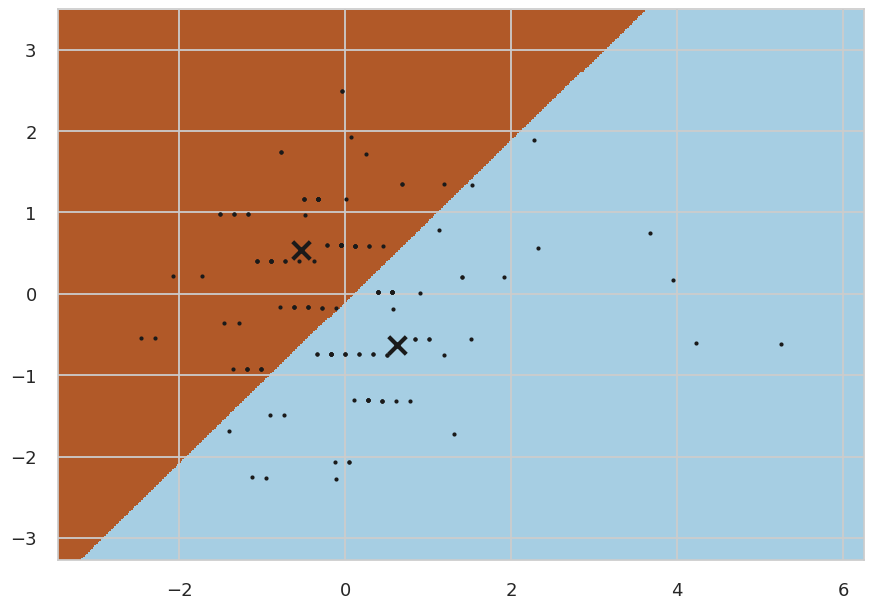

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=6)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=160,
    linewidths=3,
    color="k",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.11248639, -0.7576077 ],
       [ 3.14133982,  0.46213359],
       [-0.47277744,  0.74821844]])

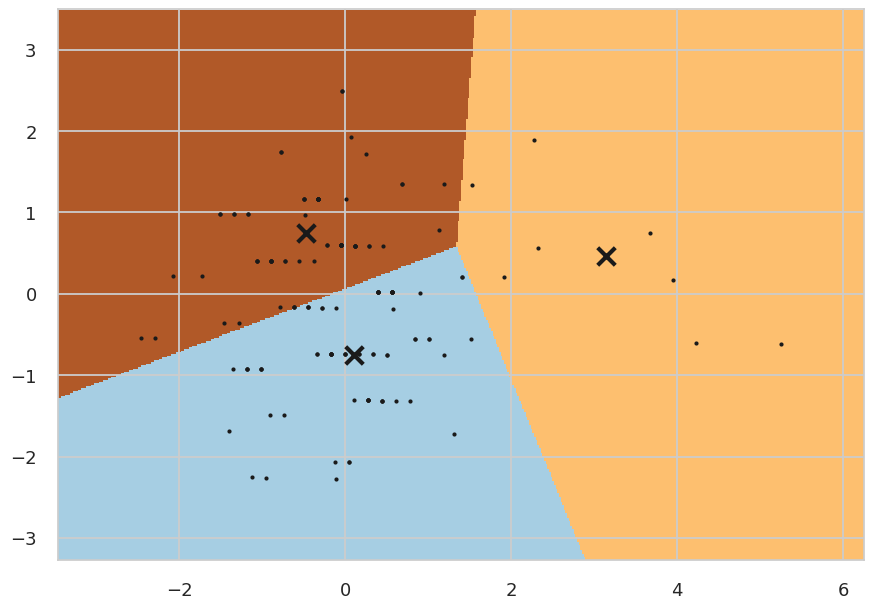

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=6)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=160,
    linewidths=3,
    color="k",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

##anova

In [ ]:
# https://www.statology.org/three-way-anova-python/

# Three-Way ANOVA in Python

In [ ]:
from scipy.stats import kruskal

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### distributions

In [ ]:
df.columns

<Axes: >

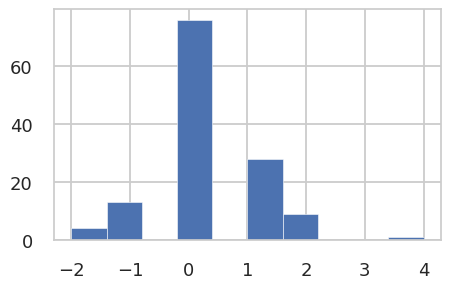

In [ ]:
p3_pos['nastroj_diff'].hist(figsize=(5,3))

<Axes: >

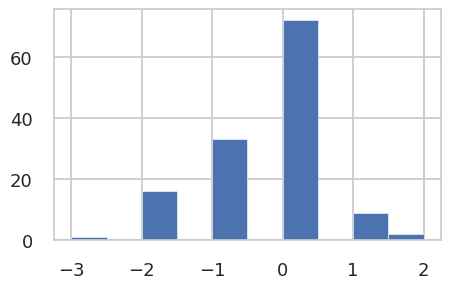

In [ ]:
p3_neg['nastroj_diff'].hist(figsize=(5,3))

<Axes: >

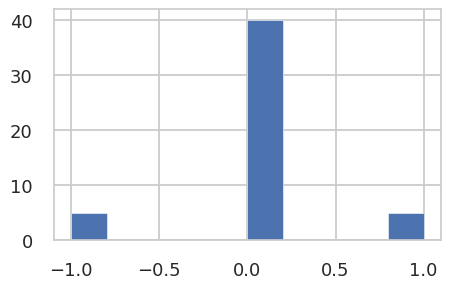

In [ ]:
p3_neu['nastroj_diff'].hist(figsize=(5,3))

<Axes: >

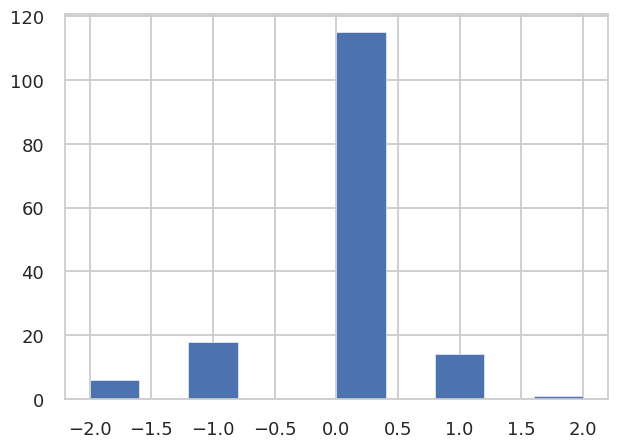

In [ ]:
df['nastroj_diff'].hist(figsize=(7,5))

In [ ]:
df.columns

Index(['kod osoby', 'typ komunikatu', 'bon', 'płeć', 'wiek', 'tryb studiow',
       'rok studiów', 'osobista waznosc egzaminu', 'Nastroj 1', 'Nastroj 2',
       'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5', 'PAS 6', 'PAS 7', 'PAS 8',
       'PAS 9', 'indeks przychylności', 'wynik ogólny', 'nastroj_diff'],
      dtype='object')

In [ ]:
df.groupby('bon')['Nastroj 1'].mean().round(3)

bon
0    3.455
1    3.313
Name: Nastroj 1, dtype: float64

In [ ]:
df.groupby( 'typ komunikatu')['nastroj_diff'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
typ komunikatu,,,,,,,,
0,50.0,0.000,0.452,-1.0,0.0,0.0,0.0,1.0
1,53.0,-0.019,0.665,-2.0,0.0,0.0,0.0,2.0
2,51.0,-0.255,0.688,-2.0,0.0,0.0,0.0,1.0


In [ ]:
df.groupby('typ komunikatu')['wynik ogólny'].mean().round(3)

typ komunikatu
negatywny    3.431
neutralny    3.222
pozytywny    3.407
Name: wynik ogólny, dtype: float64

<Axes: >

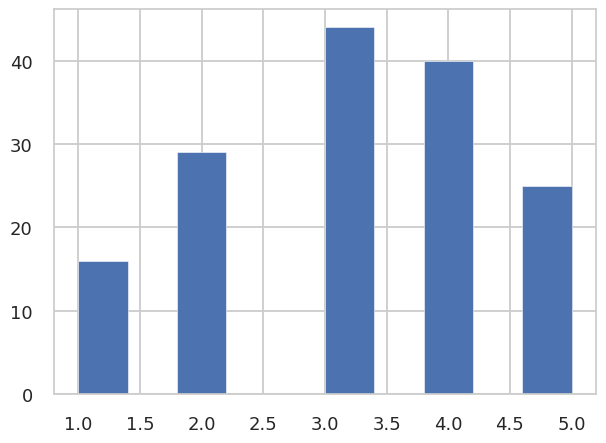

In [ ]:
df['osobista waznosc egzaminu'].hist(figsize=(7,5))

<Axes: >

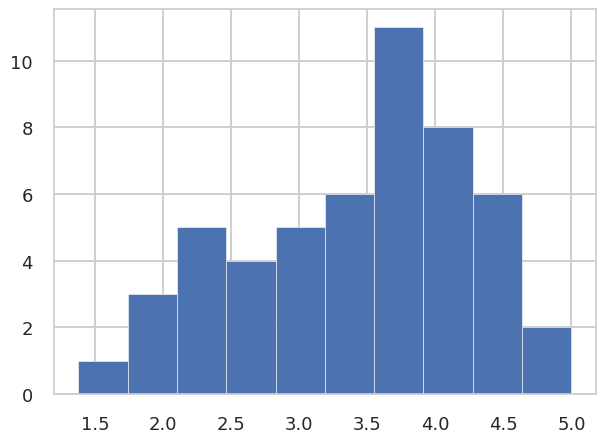

In [ ]:
p3_neg['wynik ogólny'].hist(figsize=(7,5))

<Axes: >

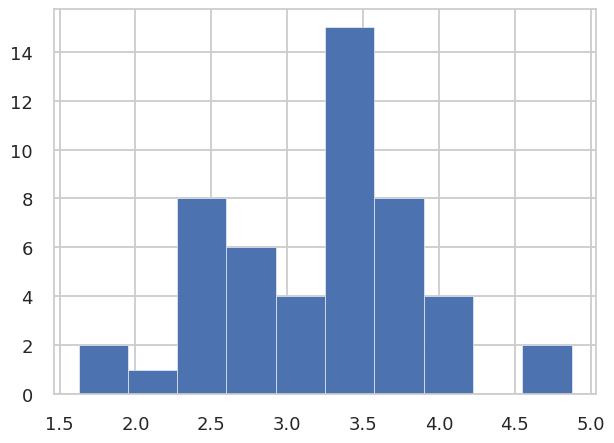

In [ ]:
p3_neu['wynik ogólny'].hist(figsize=(7,5))

<Axes: >

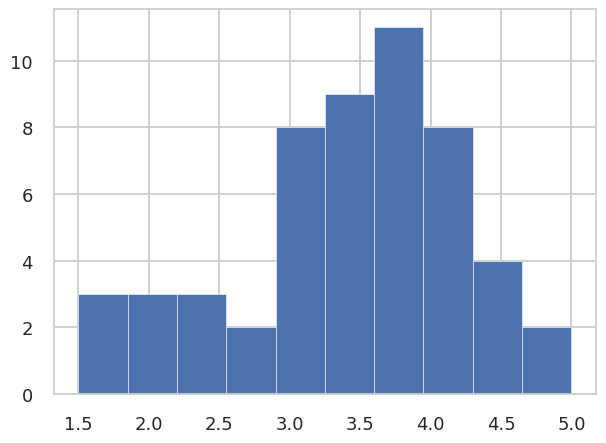

In [ ]:
p3_pos['wynik ogólny'].hist(figsize=(7,5))

### calculate

In [ ]:
df.columns[:]

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat'],
      dtype='object')

In [ ]:
df.columns[:]

Index(['kod osoby', 'typ komunikatu', 'bon', 'płeć', 'wiek', 'tryb studiow',
       'rok studiów', 'osobista waznosc egzaminu', 'Nastroj 1', 'Nastroj 2',
       'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5', 'PAS 6', 'PAS 7', 'PAS 8',
       'PAS 9', 'indeks przychylności', 'wynik ogólny', 'nastroj_diff'],
      dtype='object')

####corr wiek x PAS

In [ ]:
from scipy.stats import spearmanr, kendalltau

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat'],
      dtype='object')

In [ ]:
ktau = []
ppktau = []
catktau = []

spear = []
ppspear = []
catspear = []

In [ ]:
for i in range(1):

  stat, pv = spearmanr(df['wynik_ogólny'].values, df['wiek'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(spearmanr(df['wynik_ogólny'].values, df['wiek'].values))

SignificanceResult(statistic=-0.00642465821426916, pvalue=0.8987154603996326)


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['Nastroj1'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(spearmanr(df['wynik_ogólny'].values, df['Nastroj1'].values))


SignificanceResult(statistic=0.12198463555417031, pvalue=0.015275577848445429)


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['Nastroj2'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(round(stat, 3), round(pv, 4))

0.416 0.0


In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'komunikat_nastroj_diff',
       'Nastroj1_komunikat_congruence_komunikat_Nastroj1',
       'Nastroj1_komunikat_congruence_2',
       'Nastroj1_komunikat_congruence_2_komunikat', 'bon_sex_stim'],
      dtype='object')

In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['Nastroj1_komunikat_congruence'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(round(stat, 3), round(pv, 4))

-0.011 0.834


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['Nastroj1_komunikat_congruence_2'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(round(stat, 3), round(pv, 4))

-0.045 0.3787


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['Nastroj1_komunikat_congruence_abs'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(round(stat, 3), round(pv, 4))

-0.04 0.4334


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['waznosc'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(round(stat, 3), round(pv, 4))


  stat, pv = kendalltau(df['wynik_ogólny'].values, df['waznosc'].values)
  print(round(stat, 3), round(pv, 4))
  ktau.append(round(stat, 3))
  ppktau.append(round(pv, 4))

0.316 0.0
0.245 0.0


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wiek'].values, df['waznosc'].values)
  print(round(stat, 3), round(pv, 4))

  stat, pv = kendalltau(df['wiek'].values, df['waznosc'].values)
  print(round(stat, 3), round(pv, 4))

0.198 0.0001
0.151 0.0001


In [ ]:
for dd in [p3_pos, p3_neg, p3_neu]:
    stat, pv = spearmanr(dd['nastroj_diff'].values, dd['Nastroj2'].values)
    print(round(stat, 3), round(pv, 4))
    print('\n****************************')

0.298 0.0005

****************************
0.511 0.0

****************************
0.296 0.0006

****************************


In [ ]:
for dd in [p3_pos, p3_neg, p3_neu]:
    stat, pv = spearmanr(dd['nastroj_diff'].values, dd.Nastroj1_komunikat_congruence.values)
    print(round(stat, 3), round(pv, 4))
    print('\n****************************')

-0.531 0.0

****************************
-0.398 0.0

****************************
-0.334 0.0001

****************************


In [ ]:
for dd in [p3_pos, p3_neg, p3_neu]:
    stat, pv = spearmanr(dd['Nastroj2'].values, dd.Nastroj1_komunikat_congruence.values)
    print(round(stat, 3), round(pv, 4))
    print('\n****************************')

0.594 0.0

****************************
0.527 0.0

****************************
0.748 0.0

****************************


####stand ANOVA

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat'],
      dtype='object')

In [ ]:
df.wynik_ogólny = df.wynik_ogólny.astype('float')

In [ ]:
cols = ['indeks_przychylności', 'wynik_ogólny']

In [ ]:
# komunikat - nastroj_diff

k, p = kruskal(df[df.komunikat == 0].nastroj_diff.values, df[df.komunikat == 1].nastroj_diff.values, df[df.komunikat == 2].nastroj_diff.values)
round(k, 5), round(p, 5)

(37.33516, 0.0)

In [ ]:
# komunikat - wynik_ogólny

k, p = kruskal(df[df.komunikat == 0].wynik_ogólny.values, df[df.komunikat == 1].wynik_ogólny.values, df[df.komunikat == 2].wynik_ogólny.values)
round(k, 5), round(p, 5)

(5.6706, 0.0587)

In [ ]:
df.Nastroj1_komunikat_congruence_abs.unique()

array([0, 2, 4])

In [ ]:
# Nastroj1_komunikat_congruence_abs - wynik_ogólny

k, p = kruskal(df[df.Nastroj1_komunikat_congruence == 0].wynik_ogólny.values,
               df[df.Nastroj1_komunikat_congruence == 2].wynik_ogólny.values,
               df[df.Nastroj1_komunikat_congruence == 4].wynik_ogólny.values)
round(k, 5), round(p, 5)

(0.56056, 0.75557)

In [ ]:
# Nastroj1_komunikat_congruence - wynik_ogólny

k, p = kruskal(df[df.Nastroj1_komunikat_congruence == 0].wynik_ogólny.values,
               df[df.Nastroj1_komunikat_congruence == 2].wynik_ogólny.values,
               df[df.Nastroj1_komunikat_congruence == -2].wynik_ogólny.values,
               df[df.Nastroj1_komunikat_congruence == 4].wynik_ogólny.values,
               df[df.Nastroj1_komunikat_congruence == -4].wynik_ogólny.values)
round(k, 5), round(p, 5)

(0.82565, 0.93498)

In [ ]:
df.wynik_ogólny.describe()

count    395.000000
mean       3.277373
std        0.893152
min        1.125000
25%        2.625000
50%        3.375000
75%        4.000000
max        5.000000
Name: wynik_ogólny, dtype: float64

In [ ]:
df.columns

In [ ]:
df['Nastroj1_komunikat_congruence_3cat'] = df.Nastroj1_3cat - df.komunikat
df['Nastroj1_komunikat_congruence_3cat'] = df['Nastroj1_komunikat_congruence_3cat'].apply(lambda x: np.abs(x))
df.Nastroj1_komunikat_congruence_3cat.value_counts()

1.0    166
0.0    143
2.0     77
Name: Nastroj1_komunikat_congruence_3cat, dtype: int64

In [ ]:
df['Nastroj1_komunikat_congruence_3cat_komunikat'] = df['Nastroj1_komunikat_congruence_3cat'].astype('int').astype('str') +'_'+ df.komunikat.astype('str')
df.Nastroj1_komunikat_congruence_3cat_komunikat.value_counts()

1_1    79
0_0    57
0_1    51
1_2    48
2_2    44
1_0    39
0_2    35
2_0    33
Name: Nastroj1_komunikat_congruence_3cat_komunikat, dtype: int64

In [ ]:
df = df[df.płeć.isin([1,2])]

In [ ]:
## up 3cat Nastroj1_komunikat_congruence_3cat

for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_3cat)+C(waznosc_3cat)+C(komunikat):C(waznosc_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                         sum_sq     df        F  PR(>F)
C(komunikat)                            18.0882    2.0  14.6466  0.0000
C(Nastroj1_komunikat_congruence_3cat)   15.6339    4.0   6.3296  0.0001
C(waznosc_3cat)                          0.5623    2.0   0.4554  0.6346
C(komunikat):C(waznosc_3cat)             0.5413    4.0   0.2192  0.9277
Residual                               230.3225  373.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     5.850
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           2.54e-09
Time:                        17:16:44   Log-Likelihood:                -448.05
No. Observations:                 386   AIC:                             922.1
Df

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.2696 0.0197  0.0347  0.5045   True
     0      2  -0.3708 0.0007 -0.6071 -0.1346   True
     1      2  -0.6404    0.0 -0.8762 -0.4046   True
----------------------------------------------------


In [ ]:
for c in {'nastroj_diff_3cat'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff_3cat
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.2463 0.0574 -0.4986  0.006  False
     0      2   0.1813 0.2136 -0.0724 0.4351  False
     1      2   0.4276 0.0003  0.1743 0.6809   True
---------------------------------------------------


In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  -2.0   -1.0  -0.0272 0.9998 -0.4374  0.383  False
  -2.0    0.0   0.3077 0.1796 -0.0746   0.69  False
  -2.0    1.0   0.6295 0.0004  0.2123 1.0466   True
  -2.0    2.0   0.5758 0.0182  0.0651 1.0864   True
  -1.0    0.0   0.3349 0.0209  0.0334 0.6364   True
  -1.0    1.0   0.6566    0.0   0.312 1.0012   True
  -1.0    2.0   0.6029 0.0028  0.1496 1.0563   True
   0.0    1.0   0.3218 0.0383  0.0109 0.6326   True
   0.0    2.0   0.2681 0.4255 -0.1602 0.6963  False
   1.0    2.0  -0.0537 0.9977 -0.5133 0.4059  False
---------------------------------------------------


In [ ]:
for c in {'nastroj_diff_3cat'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff_3cat
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -2.0   -1.0  -0.4854 0.0063 -0.8748  -0.096   True
  -2.0    0.0  -0.7727    0.0 -1.1356 -0.4099   True
  -2.0    1.0  -1.4563    0.0 -1.8522 -1.0603   True
  -2.0    2.0  -1.0152    0.0 -1.4999 -0.5304   True
  -1.0    0.0  -0.2874 0.0485 -0.5735 -0.0012   True
  -1.0    1.0  -0.9709    0.0  -1.298 -0.6438   True
  -1.0    2.0  -0.5298 0.0073 -0.9601 -0.0995   True
   0.0    1.0  -0.6835    0.0 -0.9786 -0.3885   True
   0.0    2.0  -0.2424 0.4762 -0.6489  0.1641  False
   1.0    2.0   0.4411  0.046  0.0048  0.8774   True
----------------------------------------------------


In [ ]:
## up 3cat Nastroj1_komunikat_congruence_3cat

for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_3cat)+C(waznosc_3cat)+\
                  C(komunikat):C(waznosc_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                         sum_sq     df        F  PR(>F)
C(komunikat)                             4.0227    2.0   2.8796  0.0574
C(Nastroj1_komunikat_congruence_3cat)    3.7075    2.0   2.6540  0.0717
C(waznosc_3cat)                         34.1522    2.0  24.4477  0.0000
C(komunikat):C(waznosc_3cat)             3.7621    4.0   1.3465  0.2521
Residual                               261.9279  375.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     6.634
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.71e-09
Time:                        17:31:24   Log-Likelihood:                -472.87
No. Observations:                 386   AIC:                             967.7
Df

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1479 0.3754 -0.1124  0.4082  False
     0      2  -0.1247 0.5019 -0.3865  0.1371  False
     1      2  -0.2726 0.0386 -0.5339 -0.0113   True
----------------------------------------------------


In [ ]:
df.groupby('waznosc_3cat').wynik_ogólny.mean().round(3)

waznosc_3cat
0.0    3.265
1.0    3.512
2.0    2.831
Name: wynik_ogólny, dtype: float64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2466 0.0585 -0.0069     0.5  False
   0.0    2.0  -0.4341 0.0014 -0.7243 -0.1439   True
   1.0    2.0  -0.6807    0.0  -0.928 -0.4334   True
----------------------------------------------------


In [ ]:
df.groupby('Nastroj1_komunikat_congruence_3cat').wynik_ogólny.mean().round(3)

Nastroj1_komunikat_congruence_3cat
0.0    3.319
1.0    3.363
2.0    3.020
Name: wynik_ogólny, dtype: float64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -2.0   -1.0    0.236 0.6033 -0.2137  0.6857  False
  -2.0    0.0   0.1642 0.8198 -0.2549  0.5833  False
  -2.0    1.0   0.1767 0.8274 -0.2806   0.634  False
  -2.0    2.0  -0.3139  0.539 -0.8737  0.2459  False
  -1.0    0.0  -0.0717 0.9758 -0.4023  0.2588  False
  -1.0    1.0  -0.0593 0.9928 -0.4371  0.3185  False
  -1.0    2.0  -0.5499 0.0217 -1.0469 -0.0529   True
   0.0    1.0   0.0124    1.0 -0.3284  0.3532  False
   0.0    2.0  -0.4781 0.0435 -0.9476 -0.0087   True
   1.0    2.0  -0.4906 0.0606 -0.9945  0.0133  False
----------------------------------------------------


In [ ]:
## up 3cat Nastroj1_komunikat_congruence_3cat - abs

for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_3cat)+C(waznosc_3cat)+\
        C(komunikat):C(Nastroj1_komunikat_congruence_3cat)+C(komunikat):C(waznosc_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                                      sum_sq     df        F  \
C(komunikat)                                          5.6001    2.0   4.0726   
C(Nastroj1_komunikat_congruence_3cat)                 1.2360    2.0   0.8988   
C(waznosc_3cat)                                      33.5538    2.0  24.4012   
C(komunikat):C(Nastroj1_komunikat_congruence_3cat)    8.2152    4.0   2.9871   
C(komunikat):C(waznosc_3cat)                          3.8479    4.0   1.3992   
Residual                                            255.7665  372.0      NaN   

                                                    PR(>F)  
C(komunikat)                                        0.0443  
C(Nastroj1_komunikat_congruence_3cat)               0.3437  
C(waznosc_3cat)                                     0.0000  
C(komunikat):C(Nastroj1_komunikat_congruence_3cat)  0.0311  
C(komunikat):C(waznosc_3cat)                        0.2337  
Residual                                               NaN  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for c in {'wynik_ogólny'}: # abs
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.0435 0.9032 -0.1947  0.2818  False
   0.0    2.0  -0.2988 0.0465  -0.594 -0.0036   True
   1.0    2.0  -0.3423 0.0149 -0.6302 -0.0543   True
----------------------------------------------------


In [ ]:
# Nastroj1_komunikat_congruence_3cat_komunikat

for c in {'wynik_ogólny'}: # abs
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_3cat_komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0_0    0_1  -0.0796 0.9998  -0.597  0.4378  False
   0_0    0_2  -0.4979 0.1476 -1.0743  0.0786  False
   0_0    1_0  -0.1296 0.9967 -0.6874  0.4283  False
   0_0    1_1  -0.0342    1.0 -0.5007  0.4323  False
   0_0    1_2  -0.2076 0.9307 -0.7334  0.3183  False
   0_0    2_0  -0.6284 0.0263 -1.2155 -0.0412   True
   0_0    2_2  -0.3145 0.6345 -0.8531  0.2242  False
   0_1    0_2  -0.4183 0.3762 -1.0075  0.1709  False
   0_1    1_0    -0.05    1.0  -0.621   0.521  False
   0_1    1_1   0.0454    1.0 -0.4367  0.5276  False
   0_1    1_2   -0.128 0.9963 -0.6678  0.4118  False
   0_1    2_0  -0.5488 0.1007 -1.1485  0.0509  False
   0_1    2_2  -0.2349    0.9 -0.7872  0.3174  False
   0_2    1_0   0.3683 0.6231 -0.2567  0.9933  False
   0_2    1_1   0.4637 0.1616 -0.0813  1.0087  False
   0_2    1_2   0.2903 0.8163 -0.

In [ ]:
##

for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(bon)+C(komunikat)+C(nastroj_diff)+C(Nastroj1_komunikat_congruence_2)+C(waznosc)+C(Nastroj1)+\
        C(komunikat):C(nastroj_diff)+C(komunikat):C(Nastroj1_komunikat_congruence_2)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                                   sum_sq     df        F  \
C(bon)                                             1.1803    1.0   2.3039   
C(komunikat)                                       0.9408    2.0   0.9182   
C(nastroj_diff)                                   88.9099    7.0  24.7936   
C(Nastroj1_komunikat_congruence_2)                34.6771    8.0   8.4614   
C(waznosc)                                        27.9853    4.0  13.6571   
C(Nastroj1)                                       23.5256    4.0  11.4807   
C(komunikat):C(nastroj_diff)                      14.5417   14.0   2.0276   
C(komunikat):C(Nastroj1_komunikat_congruence_2)   47.5204   16.0   5.7976   
Residual                                         179.8123  351.0      NaN   

                                                 PR(>F)  
C(bon)                                           0.1299  
C(komunikat)                                     0.3386  
C(nastroj_diff)                           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 11
  warnings.warn('covariance of constraints does not have full '
/usr/local

In [ ]:
##

for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(bon)+C(komunikat)+C(nastroj_diff)+C(Nastroj1_komunikat_congruence_2)+C(waznosc)+C(Nastroj1)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                      sum_sq     df        F  PR(>F)
C(bon)                                0.8568    1.0   1.6417  0.2009
C(komunikat)                          0.5698    2.0   0.5459  0.5798
C(nastroj_diff)                      61.6277    7.0  16.8694  0.0000
C(Nastroj1_komunikat_congruence_2)   17.5553    8.0   4.2047  0.0001
C(waznosc)                           29.4309    4.0  14.0983  0.0000
C(Nastroj1)                          24.2074    4.0  11.5961  0.0000
Residual                            193.0990  370.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     9.677
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           6.92e-27
Time:                        13:39:04   

In [ ]:

##

for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_2)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                      sum_sq     df        F  PR(>F)
C(komunikat)                          6.3311    2.0   6.3707  0.0019
C(Nastroj1_komunikat_congruence_2)   60.7971    8.0  15.2942  0.0000
Residual                            186.3365  375.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     17.58
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.96e-26
Time:                        14:56:27   Log-Likelihood:                -407.15
No. Observations:                 386   AIC:                             836.3
Df Residuals:                     375   BIC:                             879.8
Df Model:                          10                                         


In [ ]:
##

for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj2)+C(Nastroj1_komunikat_congruence_2)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                      sum_sq     df             F  PR(>F)
C(komunikat)                        121.0044    2.0  7.581465e+29     0.0
C(Nastroj2)                         186.3365    4.0  5.837405e+29     0.0
C(Nastroj1_komunikat_congruence_2)  206.7302    8.0  3.238142e+29     0.0
Residual                              0.0000  371.0           NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.450e+29
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:54:57   Log-Likelihood:                 11947.
No. Observations:                 386   AIC:                        -2.386e+04
Df Residuals:                     371   BIC:                    

In [ ]:
df['bon_sex_stim'] = df.bon.astype('str') + "_"+df.płeć.map({1:'k', 2:'m'}).astype('str') + "_"+df.komunikat.astype('str')
df['bon_sex_stim'].value_counts()

1_k_0    55
0_k_2    55
0_k_0    52
1_k_1    50
0_k_1    49
1_k_2    48
0_m_1    16
1_m_1    15
1_m_2    13
0_m_0    12
0_m_2    11
1_m_0    10
Name: bon_sex_stim, dtype: int64

In [ ]:
##

for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_2)+C(waznosc)+C(bon):C(płeć):C(komunikat)+\
      C(rok)+C(Nastroj1_komunikat_congruence_2_komunikat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                                sum_sq     df        F  PR(>F)
C(komunikat)                                    1.6871    2.0   1.8836  0.1536
C(Nastroj1_komunikat_congruence_2)             63.4302    8.0  17.7043  0.0000
C(waznosc)                                      4.9078    4.0   2.7397  0.0286
C(rok)                                          1.6608    1.0   3.7085  0.0549
C(Nastroj1_komunikat_congruence_2_komunikat)   88.4504   14.0  14.1073  0.0000
C(bon):C(płeć):C(komunikat)                    19.6955    9.0   4.8865  0.0000
Residual                                      159.8807  357.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     9.074
Date:                Sat, 10 Jun 2023  

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'komunikat_nastroj_diff',
       'Nastroj1_komunikat_congruence_komunikat_Nastroj1',
       'Nastroj1_komunikat_congruence_2',
       'Nastroj1_komunikat_congruence_2_komunikat', 'bon_sex_stim'],
      dtype='object')

In [ ]:
df.groupby('bon_sex_stim').nastroj_diff.mean().round(2).sort_values()

bon_sex_stim
0_m_2   -0.73
0_k_2   -0.64
1_k_2   -0.31
0_m_0   -0.25
1_m_0   -0.20
1_k_1   -0.08
0_k_0   -0.06
1_k_0    0.04
1_m_1    0.07
1_m_2    0.38
0_k_1    0.41
0_m_1    0.75
Name: nastroj_diff, dtype: float64

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['bon_sex_stim'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 0_k_0  0_k_1   0.4659 0.1028  -0.039  0.9708  False
 0_k_0  0_k_2  -0.5787 0.0068 -1.0692 -0.0882   True
 0_k_0  0_m_0  -0.1923 0.9998 -1.0045  0.6198  False
 0_k_0  0_m_1   0.8077 0.0148  0.0827  1.5327   True
 0_k_0  0_m_2  -0.6696 0.2741 -1.5112   0.172  False
 0_k_0  1_k_0   0.0941    1.0 -0.3965  0.5846  False
 0_k_0  1_k_1  -0.0223    1.0 -0.5246    0.48  False
 0_k_0  1_k_2  -0.2548 0.8887 -0.7624  0.2528  False
 0_k_0  1_m_0  -0.1423    1.0  -1.018  0.7334  False
 0_k_0  1_m_1   0.1244    1.0 -0.6189  0.8676  False
 0_k_0  1_m_2   0.4423  0.789 -0.3441  1.2287  False
 0_k_1  0_k_2  -1.0445    0.0 -1.5427 -0.5464   True
 0_k_1  0_m_0  -0.6582  0.256  -1.475  0.1586  False
 0_k_1  0_m_1   0.3418 0.9285 -0.3884   1.072  False
 0_k_1  0_m_2  -1.1354 0.0008 -1.9815 -0.2893   True
 0_k_1  1_k_0  -0.3718 0.3722   -

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_2_komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -1_0   -1_1  -0.3045 0.9543 -0.9479  0.3388  False
  -1_0   -2_0   0.3214 0.9955  -0.553  1.1959  False
  -1_0   -2_1   0.0586    1.0 -0.5955  0.7127  False
  -1_0   -3_1   0.6467 0.0854 -0.0363  1.3297  False
  -1_0   -4_1   1.2381 0.0014  0.2753  2.2009   True
  -1_0    0_0  -0.0777    1.0 -0.6946  0.5392  False
  -1_0    0_1  -0.4702 0.9581 -1.4742  0.5338  False
  -1_0    0_2   0.5048 0.9838 -0.6977  1.7073  False
  -1_0    1_0  -0.4381 0.6337 -1.1051  0.2289  False
  -1_0    1_2  -0.0952    1.0 -0.7828  0.5923  False
  -1_0    2_0  -0.5952 0.9692 -1.9136  0.7231  False
  -1_0    2_2  -0.4589 0.4834 -1.0998  0.1821  False
  -1_0    3_2  -1.0702    0.0 -1.7214  -0.419   True
  -1_0    4_2  -0.2202    1.0 -1.2242  0.7838  False
  -1_1   -2_0    0.626 0.3035  -0.163  1.4149  False
  -1_1   -2_1   0.3631 0.5759 -0.

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1613 0.8876 -0.3173   0.64  False
     1      3   0.2105 0.6964 -0.2361 0.6572  False
     1      4   0.0805 0.9873 -0.3609 0.5219  False
     1      5   0.1474 0.8936 -0.2972  0.592  False
     2      3   0.0492 0.9967 -0.3333 0.4316  False
     2      4  -0.0808 0.9767 -0.4571 0.2955  False
     2      5   -0.014    1.0  -0.394 0.3661  False
     3      4    -0.13 0.8244 -0.4646 0.2046  False
     3      5  -0.0632 0.9863  -0.402 0.2757  False
     4      5   0.0668 0.9816  -0.265 0.3987  False
---------------------------------------------------


In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.2696 0.0197  0.0347  0.5045   True
     0      2  -0.3708 0.0007 -0.6071 -0.1346   True
     1      2  -0.6404    0.0 -0.8762 -0.4046   True
----------------------------------------------------


In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_2'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -4.0   -3.0  -0.5914 0.4177 -1.4359  0.2531  False
  -4.0   -2.0  -1.1176 0.0007  -1.924 -0.3113   True
  -4.0   -1.0  -1.4427    0.0 -2.2367 -0.6487   True
  -4.0    0.0   -1.319    0.0 -2.1089 -0.5292   True
  -4.0    1.0  -1.5179    0.0 -2.3112 -0.7247   True
  -4.0    2.0  -1.7083    0.0 -2.5185 -0.8982   True
  -4.0    3.0  -2.3083    0.0 -3.1312 -1.4855   True
  -4.0    4.0  -1.4583 0.0011 -2.5421 -0.3746   True
  -3.0   -2.0  -0.5262 0.0358 -1.0342 -0.0183   True
  -3.0   -1.0  -0.8513    0.0 -1.3394 -0.3633   True
  -3.0    0.0  -0.7276 0.0001 -1.2088 -0.2465   True
  -3.0    1.0  -0.9266    0.0 -1.4134 -0.4397   True
  -3.0    2.0  -1.1169    0.0 -1.6308  -0.603   True
  -3.0    3.0  -1.7169    0.0 -2.2506 -1.1832   True
  -3.0    4.0  -0.8669 0.0597 -1.7514  0.0175  False
  -2.0   -1.0  -0.3251 0.2748 -0.

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_2_komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -1_0   -1_1   0.3104 0.9914 -0.4804  1.1011  False
  -1_0   -2_0  -0.6912 0.6678 -1.7661  0.3836  False
  -1_0   -2_1   0.4574 0.8298 -0.3465  1.2614  False
  -1_0   -3_1   0.4118 0.9395 -0.4277  1.2513  False
  -1_0   -4_1  -0.3909 0.9985 -1.5743  0.7925  False
  -1_0    0_0    0.377 0.9328 -0.3812  1.1353  False
  -1_0    0_1   0.2281    1.0  -1.006  1.4621  False
  -1_0    0_2   0.5327 0.9963 -0.9453  2.0108  False
  -1_0    1_0    0.256 0.9992 -0.5639  1.0758  False
  -1_0    1_2  -0.2298 0.9998 -1.0749  0.6153  False
  -1_0    2_0   0.1734    1.0 -1.4471  1.7938  False
  -1_0    2_2   0.0626    1.0 -0.7252  0.8504  False
  -1_0    3_2   0.1156    1.0 -0.6849   0.916  False
  -1_0    4_2    0.439 0.9968 -0.7951  1.6731  False
  -1_1   -2_0  -1.0016 0.0351 -1.9713 -0.0318   True
  -1_1   -2_1   0.1471    1.0 -0.

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0_-1   0_-2   0.4673    1.0 -2.4946  3.4291  False
  0_-1    0_0   0.0876    1.0 -0.6116  0.7867  False
  0_-1    0_1    0.436 0.9926 -0.6112  1.4832  False
  0_-1    0_2   0.9673 0.9996 -1.9946  3.9291  False
  0_-1    0_3  -0.4077    1.0 -3.3696  2.5541  False
  0_-1   1_-1  -0.4174  0.994 -1.4386  0.6039  False
  0_-1   1_-2  -1.0327 0.6838 -2.6114   0.546  False
  0_-1    1_0   0.1973    1.0 -0.5172  0.9117  False
  0_-1    1_1   0.7641 0.1199 -0.0712  1.5995  False
  0_-1    1_2   0.9048 0.3451 -0.2482  2.0577  False
  0_-1    1_4  -1.0327 0.9991 -3.9946  1.9291  False
  0_-1   2_-1   -0.564 0.5789 -1.3767  0.2487  False
  0_-1   2_-2  -0.4702 0.9677 -1.4485   0.508  False
  0_-1   2_-3  -1.6577  0.883 -4.6196  1.3041  False
  0_-1    2_0   0.2662 0.9982  -0.455  0.9874  False
  0_-1    2_1   0.6313 0.9293  -0

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1479 0.3754 -0.1124  0.4082  False
     0      2  -0.1247 0.5019 -0.3865  0.1371  False
     1      2  -0.2726 0.0386 -0.5339 -0.0113   True
----------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  -3.0   -2.0   1.1219 0.8889 -1.4583 3.7021  False
  -3.0   -1.0   1.3021 0.7713 -1.2349 3.8391  False
  -3.0    0.0    1.832 0.3463 -0.6913 4.3553  False
  -3.0    1.0   2.3177  0.104 -0.2264 4.8618  False
  -3.0    2.0   2.5573 0.0616 -0.0635 5.1781  False
  -3.0    3.0     1.25 0.9626  -2.311  4.811  False
  -3.0    4.0    0.625 0.9995  -2.936  4.186  False
  -2.0   -1.0   0.1802 0.9897 -0.4625 0.8229  False
  -2.0    0.0   0.7101 0.0062  0.1238 1.2965   True
  -2.0    1.0   1.1958    0.0  0.5257  1.866   True
  -2.0    2.0   1.4354 0.0001   0.516 2.3549   True
  -2.0    3.0   0.1281    1.0 -2.4521 2.7083  False
  -2.0    4.0  -0.4969  0.999 -3.0771 2.0833  False
  -1.0    0.0   0.5299 0.0001  0.1795 0.8804   True
  -1.0    1.0   1.0156    0.0   0.538 1.4933   True
  -1.0    2.0   1.2552 0.0001   0.465 2.0454   True

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.4235 0.2096 -0.1215 0.9685  False
   1.0    3.0   0.6525 0.0054  0.1354 1.1696   True
   1.0    4.0   0.5801 0.0218  0.0555 1.1046   True
   1.0    5.0   0.6534 0.0958 -0.0668 1.3735  False
   2.0    3.0    0.229 0.3387 -0.1077 0.5657  False
   2.0    4.0   0.1566 0.7322 -0.1915 0.5047  False
   2.0    5.0   0.2299  0.835  -0.374 0.8337  False
   3.0    4.0  -0.0724 0.9655  -0.375 0.2302  False
   3.0    5.0   0.0009    1.0 -0.5779 0.5797  False
   4.0    5.0   0.0733  0.997 -0.5122 0.6588  False
---------------------------------------------------


In [ ]:
df.groupby('Nastroj2').wynik_ogólny.mean().round(2).reset_index()

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4112  0.122 -0.0616 0.8841  False
     1      3   0.6888 0.0002  0.2468 1.1309   True
     1      4   0.8231    0.0  0.3874 1.2589   True
     1      5   1.0037    0.0  0.5623  1.445   True
     2      3   0.2776 0.2614 -0.1003 0.6555  False
     2      4   0.4119 0.0208  0.0414 0.7824   True
     2      5   0.5924 0.0002  0.2154 0.9695   True
     3      4   0.1343  0.799  -0.196 0.4645  False
     3      5   0.3148 0.0808 -0.0228 0.6524  False
     4      5   0.1806 0.5615 -0.1488 0.5099  False
---------------------------------------------------


In [ ]:
df.groupby('waznosc').wynik_ogólny.mean().round(2).reset_index()

,waznosc,wynik_ogólny
0,1,2.59
1,2,3.00
2,3,3.28
3,4,3.41
4,5,3.59


In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(nastroj_diff)+C(waznosc)+C(nastroj_diff):C(waznosc)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                              sum_sq     df         F  PR(>F)
C(nastroj_diff)             785.3662    7.0  183.6449  0.0000
C(waznosc)                   -0.0000    4.0   -0.0000  1.0000
C(nastroj_diff):C(waznosc)   41.7531   28.0    2.4408  0.0005
Residual                    224.8242  368.0       NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     5.633
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.71e-15
Time:                        10:51:48   Log-Likelihood:                -449.18
No. Observations:                 395   AIC:                             952.4
Df Residuals:                     368   BIC:                             1060.
Df Model:                          26        

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 21
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    -3     -2   1.1399 0.8806 -1.4416 3.7214  False
    -3     -1   1.3069 0.7694  -1.234 3.8478  False
    -3      0   1.8338 0.3472 -0.6935 4.3612  False
    -3      1   2.2934  0.113 -0.2544 4.8411  False
    -3      2   2.5573 0.0624 -0.0678 5.1824  False
    -3      3     1.25  0.963 -2.3168 4.8168  False
    -3      4    0.625 0.9995 -2.9418 4.1918  False
    -2     -1    0.167 0.9927 -0.4637 0.7978  False
    -2      0    0.694 0.0063  0.1203 1.2676   True
    -2      1   1.1535    0.0  0.4957 1.8113   True
    -2      2   1.4174 0.0001  0.5047 2.3301   True
    -2      3   0.1101    1.0 -2.4714 2.6916  False
    -2      4  -0.5149 0.9988 -3.0964 2.0666  False
    -1      0   0.5269 0.0001  0.1789  0.875   True
    -1      1   0.9865    0.0  0.5124 1.4606   True
    -1      2   1.2504 0.0001  0.4598  2.041   True

In [ ]:
df.groupby('nastroj_diff')['wynik_ogólny'].mean().round(3).reset_index()

,nastroj_diff,wynik_ogólny
0,-3,1.500
1,-2,2.640
2,-1,2.807
3,0,3.334
4,1,3.793
5,2,4.057
6,3,2.750
7,4,2.125


In [ ]:
df['komunikat_nastroj_diff'] = df['komunikat'].astype('str') + "_" + df['nastroj_diff'].astype('str')
df['komunikat_nastroj_diff'].value_counts()

0_0     95
1_0     76
2_0     72
2_-1    33
1_1     28
0_-1    21
2_-2    16
1_-1    13
0_1     12
2_1      9
1_2      9
1_-2     4
2_2      2
2_-3     1
0_3      1
0_-2     1
0_2      1
1_4      1
Name: komunikat_nastroj_diff, dtype: int64

In [ ]:
df.groupby('komunikat_nastroj_diff')['wynik_ogólny'].mean().round(3).reset_index()

,komunikat_nastroj_diff,wynik_ogólny
0,0_-1,3.158
1,0_-2,3.625
2,0_0,3.237
3,0_1,3.594
4,0_2,4.125
5,0_3,2.750
6,1_-1,2.740
7,1_-2,2.125
8,1_0,3.364
9,1_1,3.922


In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat_nastroj_diff)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


wynik_ogólny
                             sum_sq     df       F  PR(>F)
C(komunikat_nastroj_diff)   58.0152   17.0  5.0201     0.0
Residual                   256.2865  377.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.020
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           7.28e-10
Time:                        10:52:18   Log-Likelihood:                -475.04
No. Observations:                 395   AIC:                             986.1
Df Residuals:                     377   BIC:                             1058.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0_-1   0_-2   0.4673    1.0 -2.4976  3.4321  False
  0_-1    0_0   0.0791    1.0 -0.6194  0.7776  False
  0_-1    0_1    0.436 0.9927 -0.6122  1.4843  False
  0_-1    0_2   0.9673 0.9996 -1.9976  3.9321  False
  0_-1    0_3  -0.4077    1.0 -3.3726  2.5571  False
  0_-1   1_-1  -0.4174  0.994 -1.4396  0.6049  False
  0_-1   1_-2  -1.0327 0.6858  -2.613  0.5476  False
  0_-1    1_0   0.2066 0.9999 -0.5076  0.9207  False
  0_-1    1_1   0.7641  0.121 -0.0721  1.6003  False
  0_-1    1_2   0.9048 0.3472 -0.2493  2.0588  False
  0_-1    1_4  -1.0327 0.9991 -3.9976  1.9321  False
  0_-1   2_-1  -0.5479 0.6231 -1.3565  0.2607  False
  0_-1   2_-2  -0.4507 0.9746  -1.412  0.5105  False
  0_-1   2_-3  -1.6577 0.8841 -4.6226  1.3071  False
  0_-1    2_0   0.2719 0.9975 -0.4465  0.9904  False
  0_-1    2_1    0.502 0.9881 -0.

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(nastroj_diff)+C(komunikat_nastroj_diff)+C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


wynik_ogólny
                             sum_sq     df        F  PR(>F)
C(nastroj_diff)             39.7899    7.0   8.3616   0.000
C(komunikat_nastroj_diff)  612.5637   17.0  53.0051   0.000
C(komunikat)                 0.4795    2.0   0.3527   0.703
Residual                   256.2865  377.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.020
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           7.28e-10
Time:                        10:53:18   Log-Likelihood:                -475.04
No. Observations:                 395   AIC:                             986.1
Df Residuals:                     377   BIC:                             1058.
Df Model:                          17                  

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'komunikat_nastroj_diff'],
      dtype='object')

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -4     -2  -0.6993    0.0 -1.0869 -0.3118   True
    -4      0  -0.9233    0.0  -1.276 -0.5706   True
    -4      2  -1.2321    0.0 -1.6115 -0.8528   True
    -4      4  -1.7019    0.0 -2.1172 -1.2866   True
    -2      0   -0.224 0.1912 -0.5061  0.0582  False
    -2      2  -0.5328    0.0 -0.8476  -0.218   True
    -2      4  -1.0026    0.0 -1.3599 -0.6453   True
     0      2  -0.3089 0.0162 -0.5796 -0.0381   True
     0      4  -0.7786    0.0 -1.0978 -0.4595   True
     2      4  -0.4698 0.0023 -0.8182 -0.1213   True
----------------------------------------------------


In [ ]:
df['Nastroj1_komunikat_congruence_komunikat_Nastroj1'] = df['Nastroj1_komunikat_congruence_komunikat'].astype('str') +"_" + df.Nastroj1.astype('str')
df['Nastroj1_komunikat_congruence_komunikat_Nastroj1'].value_counts()

0_0_3     58
2_2_3     45
4_2_4     44
0_1_4     43
-2_1_3    40
2_0_4     35
-4_1_2    31
0_2_2     30
-2_0_2    22
-2_0_1    12
-4_1_1     9
4_2_5      8
0_1_5      8
0_2_1      6
2_0_5      4
Name: Nastroj1_komunikat_congruence_komunikat_Nastroj1, dtype: int64

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1)+C(Nastroj1_komunikat_congruence_komunikat)+C(Nastroj1):C(Nastroj1_komunikat_congruence_komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


nastroj_diff
                                                          sum_sq     df  \
C(Nastroj1)                                              33.2965    4.0   
C(Nastroj1_komunikat_congruence_komunikat)              226.7118    8.0   
C(Nastroj1):C(Nastroj1_komunikat_congruence_komunikat)  133.9919   32.0   
Residual                                                189.0586  380.0   

                                                              F  PR(>F)  
C(Nastroj1)                                             16.7312  0.0001  
C(Nastroj1_komunikat_congruence_komunikat)              56.9602  0.0000  
C(Nastroj1):C(Nastroj1_komunikat_congruence_komunikat)   8.4162  0.0000  
Residual                                                    NaN     NaN  
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.298
Meth

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 32, but rank is 11
  warnings.warn('covariance of constraints does not have full '


In [ ]:
#Nastroj1_komunikat_congruence_komunikat_Nastroj1

for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_komunikat_Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
-2_0_1 -2_0_2  -0.3258 0.9942 -1.1899  0.5384  False
-2_0_1 -2_1_3  -0.2667 0.9982 -1.0592  0.5259  False
-2_0_1 -4_1_1   0.9167   0.18 -0.1452  1.9785  False
-2_0_1 -4_1_2   0.3253 0.9904 -0.4934   1.144  False
-2_0_1  0_0_3  -0.3994 0.9027 -1.1631  0.3642  False
-2_0_1  0_1_4   -0.626 0.2979 -1.4121  0.1602  False
-2_0_1  0_1_5  -0.7917 0.4727 -1.8908  0.3074  False
-2_0_1  0_2_1     0.25    1.0  -0.954   1.454  False
-2_0_1  0_2_2  -0.4167 0.9228 -1.2392  0.4058  False
-2_0_1  2_0_4  -0.7595 0.0888 -1.5651   0.046  False
-2_0_1  2_0_5  -0.9167 0.6276 -2.3069  0.4736  False
-2_0_1  2_2_3  -0.7722 0.0572 -1.5546  0.0101  False
-2_0_1  4_2_4  -1.3712    0.0 -2.1554  -0.587   True
-2_0_1  4_2_5  -0.5417 0.9373 -1.6408  0.5574  False
-2_0_2 -2_1_3   0.0591    1.0 -0.5801  0.6983  False
-2_0_2 -4_1_1   1.2424 0.0011  0.

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


nastroj_diff
                                    sum_sq     df        F  PR(>F)
C(komunikat)                        2.3995    2.0   2.3266   0.099
C(Nastroj1_komunikat_congruence)   52.4792    4.0  25.4420   0.000
Residual                          200.0818  388.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     25.64
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.16e-25
Time:                        10:55:07   Log-Likelihood:                -426.15
No. Observations:                 395   AIC:                             866.3
Df Residuals:                     388   BIC:                             894.2
Df Model:                           6                                         
Covarian

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


nastroj_diff
                sum_sq     df        F  PR(>F)
C(komunikat)   26.8466    2.0  20.8343     0.0
Residual      252.5610  392.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     20.83
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.52e-09
Time:                        10:54:45   Log-Likelihood:                -472.15
No. Observations:                 395   AIC:                             950.3
Df Residuals:                     392   BIC:                             962.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(nastroj_diff):C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


wynik_ogólny
                                 sum_sq     df         F  PR(>F)
C(nastroj_diff):C(komunikat)  5495.4410   23.0  351.4717     0.0
Residual                       256.2865  377.0       NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.020
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           7.28e-10
Time:                        10:55:32   Log-Likelihood:                -475.04
No. Observations:                 395   AIC:                             986.1
Df Residuals:                     377   BIC:                             1058.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 18
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat_nastroj_diff)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


wynik_ogólny
                            sum_sq     df       F  PR(>F)
C(komunikat_nastroj_diff)  19.6827   11.0  3.2937  0.0005
Residual                   77.1432  142.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     3.294
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           0.000477
Time:                        09:19:19   Log-Likelihood:                -165.29
No. Observations:                 154   AIC:                             354.6
Df Residuals:                     142   BIC:                             391.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0_-1    0_0  -0.4703 0.9714 -1.6322  0.6916  False
  0_-1    0_1   0.1125    1.0 -1.4367  1.6617  False
  0_-1   1_-1  -0.4125 0.9992 -1.9617  1.1367  False
  0_-1   1_-2   -1.525 0.3656 -3.5744  0.5244  False
  0_-1    1_0  -0.0458    1.0 -1.2094  1.1177  False
  0_-1    1_1  -0.1187    1.0  -1.602  1.3645  False
  0_-1    1_2  -1.9625 0.3928 -4.6458  0.7208  False
  0_-1   2_-1     -0.4 0.9984 -1.7964  0.9964  False
  0_-1   2_-2  -1.3531 0.2197 -2.9963  0.2901  False
  0_-1    2_0  -0.0285    1.0 -1.1975  1.1406  False
  0_-1    2_1   0.5583 0.9965 -1.2305  2.3472  False
   0_0    0_1   0.5828 0.8799 -0.5791  1.7447  False
   0_0   1_-1   0.0578    1.0 -1.1041  1.2197  False
   0_0   1_-2  -1.0547 0.7094 -2.8295  0.7202  False
   0_0    1_0   0.4245 0.3131 -0.1268  0.9757  False
   0_0    1_1   0.3516 0.9947 -0.

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


wynik_ogólny
               sum_sq     df       F  PR(>F)
C(komunikat)   1.3177    2.0  1.0417  0.3554
Residual      95.5081  151.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.042
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.355
Time:                        10:15:31   Log-Likelihood:                -181.73
No. Observations:                 154   AIC:                             369.5
Df Residuals:                     151   BIC:                             378.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t| 

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(płeć)""", data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


nastroj_diff
           sum_sq     df       F  PR(>F)
C(płeć)    0.5722    1.0  1.4682  0.2276
Residual  57.2935  147.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.468
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.228
Time:                        11:10:43   Log-Likelihood:                -140.22
No. Observations:                 149   AIC:                             284.4
Df Residuals:                     147   BIC:                             290.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1843 0.4695 -0.1868 0.5555  False
     0      2   0.2089 0.3865 -0.1658 0.5835  False
     1      2   0.0245 0.9865 -0.3447 0.3938  False
---------------------------------------------------


In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff'],
      dtype='object')

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(bon)+C(komunikat)+C(waznosc)+C(bon):C(komunikat):C(waznosc)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  #print(model.summary())
  print('\n ********************************')


nastroj_diff
                                 sum_sq     df       F  PR(>F)
C(bon)                           0.0042    1.0  0.0115  0.9147
C(komunikat)                     1.8650    2.0  2.5356  0.0833
C(waznosc)                       0.3484    4.0  0.2369  0.9171
C(bon):C(komunikat):C(waznosc)  10.7130   22.0  1.3241  0.1690
Residual                        45.6036  124.0     NaN     NaN

 ********************************


In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
               sum_sq     df       F  PR(>F)
C(komunikat)   2.0599    2.0  2.7444  0.0675
Residual      56.6674  151.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.744
Date:                Mon, 05 Jun 2023   Prob (F-statistic):             0.0675
Time:                        11:01:16   Log-Likelihood:                -141.54
No. Observations:                 154   AIC:                             289.1
Df Residuals:                     151   BIC:                             298.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t| 

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(waznosc)+C(Nastroj1)+C(komunikat):C(waznosc):C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                     sum_sq     df       F  PR(>F)
C(komunikat)                          0.000    2.0  0.0000  1.0000
C(waznosc)                           -0.000    4.0 -0.0000  1.0000
C(Nastroj1)                          -0.000    4.0 -0.0000  1.0000
C(komunikat):C(waznosc):C(Nastroj1)  24.410   64.0  1.0753  0.3743
Residual                             35.471  100.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.237
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.180
Time:                        11:05:39   Log-Likelihood:                -105.46
No. Observations:                 154   AIC:                             318.9
Df Residuals:                   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 47
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
              sum_sq     df       F  PR(>F)
C(Nastroj1)   5.5315    4.0  3.8734  0.0051
Residual     53.1958  149.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3.873
Date:                Mon, 05 Jun 2023   Prob (F-statistic):            0.00505
Time:                        11:02:21   Log-Likelihood:                -136.67
No. Observations:                 154   AIC:                             283.3
Df Residuals:                     149   BIC:                             298.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|     

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj2)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
              sum_sq     df       F  PR(>F)
C(Nastroj2)  11.3875    4.0  8.9604     0.0
Residual     47.3398  149.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     8.960
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.64e-06
Time:                        11:00:16   Log-Likelihood:                -127.69
No. Observations:                 154   AIC:                             265.4
Df Residuals:                     149   BIC:                             280.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|     

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat):C(Nastroj2)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                           sum_sq     df       F  PR(>F)
C(komunikat):C(Nastroj2)  17.1770   14.0  4.1045     0.0
Residual                  41.5503  139.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     4.104
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           5.90e-06
Time:                        11:00:31   Log-Likelihood:                -117.64
No. Observations:                 154   AIC:                             265.3
Df Residuals:                     139   BIC:                             310.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat):C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                           sum_sq     df       F  PR(>F)
C(komunikat):C(Nastroj1)  12.0987   14.0  2.5762  0.0025
Residual                  46.6286  139.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2.576
Date:                Mon, 05 Jun 2023   Prob (F-statistic):            0.00251
Time:                        09:30:52   Log-Likelihood:                -126.52
No. Observations:                 154   AIC:                             283.0
Df Residuals:                     139   BIC:                             328.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          

In [ ]:
df['komunikat_Nastroj1'] = df['komunikat'].astype('str') + "_" + df['Nastroj1'].astype('str')
df['komunikat_Nastroj1'].value_counts()

1_4    25
0_3    22
1_3    20
2_3    17
2_4    17
0_4    16
2_2     8
2_5     7
0_2     5
0_1     4
1_5     4
1_2     3
0_5     3
2_1     2
1_1     1
Name: komunikat_Nastroj1, dtype: int64

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0_1    0_2    -0.05    1.0 -1.3918  1.2918  False
   0_1    0_3  -0.2045    1.0 -1.2918  0.8827  False
   0_1    0_4   -0.375 0.9979 -1.4931  0.7431  False
   0_1    0_5  -0.5833 0.9921  -2.111  0.9443  False
   0_1    1_1     1.75 0.3147 -0.4863  3.9863  False
   0_1    1_2   0.0833    1.0 -1.4443   1.611  False
   0_1    1_3    -0.25    1.0 -1.3455  0.8455  False
   0_1    1_4    -0.41 0.9923 -1.4871  0.6671  False
   0_1    1_5    -0.25    1.0 -1.6643  1.1643  False
   0_1    2_1    -0.25    1.0 -1.9822  1.4822  False
   0_1    2_2    -0.25    1.0 -1.4749  0.9749  False
   0_1    2_3  -0.3088 0.9997 -1.4204  0.8027  False
   0_1    2_4  -0.8971 0.2664 -2.0086  0.2145  False
   0_1    2_5  -0.3929  0.999 -1.6465  0.8608  False
   0_2    0_3  -0.1545    1.0 -1.1455  0.8364  False
   0_2    0_4   -0.325 0.9988 -1.

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0189 0.9866 -0.3047  0.267  False
     0      2  -0.2549 0.0951 -0.5435 0.0337  False
     1      2   -0.236 0.1247 -0.5205 0.0484  False
---------------------------------------------------


In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.3036 0.7952 -1.0513  0.4442  False
     1      3  -0.4286 0.3808 -1.0882   0.231  False
     1      4  -0.7217 0.0246 -1.3819 -0.0615   True
     1      5  -0.5714 0.2404 -1.3352  0.1924  False
     2      3   -0.125 0.9462 -0.5901  0.3401  False
     2      4  -0.4181 0.1012  -0.884  0.0478  False
     2      5  -0.2679 0.7369 -0.8717   0.336  False
     3      4  -0.2931 0.0662 -0.5982   0.012  False
     3      5  -0.1429  0.929 -0.6334  0.3477  False
     4      5   0.1502 0.9162 -0.3411  0.6416  False
----------------------------------------------------


In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat):C(waznosc):C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                     sum_sq     df       F  PR(>F)
C(komunikat):C(waznosc):C(Nastroj1)  32.471   74.0  1.2371  0.1799
Residual                             35.471  100.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.237
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.180
Time:                        09:30:28   Log-Likelihood:                -105.46
No. Observations:                 154   AIC:                             318.9
Df Residuals:                     100   BIC:                             482.9
Df Model:                          53                                         
Covariance Type:            nonrobust                                      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 53
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(waznosc)+C(komunikat):C(waznosc)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                          sum_sq     df       F  PR(>F)
C(komunikat)              1.8612    2.0  2.6061  0.0774
C(waznosc)                0.3466    4.0  0.2426  0.9137
C(komunikat):C(waznosc)   6.6863    8.0  2.3406  0.0217
Residual                 49.6345  139.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.819
Date:                Mon, 05 Jun 2023   Prob (F-statistic):             0.0413
Time:                        09:27:04   Log-Likelihood:                -131.33
No. Observations:                 154   AIC:                             292.7
Df Residuals:                     139   BIC:                             338.2
Df Model:                          14                                      

In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj2)+C(waznosc)+C(Nastroj2):C(waznosc)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                         sum_sq     df       F  PR(>F)
C(Nastroj2)             11.1933    4.0  8.5500  0.0000
C(waznosc)               0.0081    4.0  0.0062  0.9993
C(Nastroj2):C(waznosc)   4.4591   16.0  0.8515  0.6255
Residual                42.8746  131.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.202
Date:                Mon, 05 Jun 2023   Prob (F-statistic):            0.00331
Time:                        10:17:59   Log-Likelihood:                -120.06
No. Observations:                 154   AIC:                             286.1
Df Residuals:                     131   BIC:                             356.0
Df Model:                          22                                         
C

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj2)+C(waznosc)+C(komunikat)+C(Nastroj2):C(waznosc):C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                      sum_sq    df       F  PR(>F)
C(Nastroj2)                          -0.6748   4.0 -0.6168  1.0000
C(waznosc)                            0.2657   4.0  0.2429  0.9133
C(komunikat)                          0.0000   2.0  0.0000  1.0000
C(Nastroj2):C(waznosc):C(komunikat)  27.9534  64.0  1.5970  0.0251
Residual                             27.0758  99.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2.143
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           0.000514
Time:                        10:17:37   Log-Likelihood:                -84.666
No. Observations:                 154   AIC:                             279.3
Df Residuals:                   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 49
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1)+C(waznosc)+C(komunikat)+C(Nastroj1):C(waznosc):C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                      sum_sq     df       F  PR(>F)
C(Nastroj1)                           9.8048    4.0  6.9104  0.0001
C(waznosc)                            0.0000    4.0  0.0000  1.0000
C(komunikat)                         -1.3564    2.0 -1.9119  1.0000
C(Nastroj1):C(waznosc):C(komunikat)  24.4100   64.0  1.0753  0.3743
Residual                             35.4710  100.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.237
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.180
Time:                        10:17:18   Log-Likelihood:                -105.46
No. Observations:                 154   AIC:                             318.9
Df Residuals:             

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 47
  warnings.warn('covariance of constraints does not have full '


In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'indeks_przychylności',
       'wynik_ogólny', 'nastroj_diff', 'komunikat_waznosc', 'komunikat_bon',
       'komunikat_nastroj_diff'],
      dtype='object')

In [ ]:
for c in {'Nastroj1', 'Nastroj2'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4547 0.5415 -0.3633 1.2728  False
     1      3   0.3239 0.7706  -0.443 1.0907  False
     1      4   0.2125 0.9428 -0.5645 0.9895  False
     1      5   0.4175 0.6472 -0.4235 1.2585  False
     2      3  -0.1309 0.9785 -0.7592 0.4974  False
     2      4  -0.2422 0.8343 -0.8829 0.3984  False
     2      5  -0.0372 0.9999 -0.7541 0.6797  False
     3      4  -0.1114 0.9835 -0.6852 0.4625  False
     3      5   0.0936 0.9949 -0.5643 0.7515  False
     4      5    0.205 0.9159 -0.4647 0.8747  False
---------------------------------------------------
Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2823 0.8919 -0.5725 1.1371  False
     1      3   0.2784 0.8728 -0.5229 1.0797  

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.1724 0.9017 -0.7098  0.365  False
     1      3  -0.0455 0.9991 -0.5492 0.4583  False
     1      4   -0.075 0.9942 -0.5854 0.4354  False
     1      5    -0.16 0.9303 -0.7125 0.3925  False
     2      3    0.127 0.9145 -0.2858 0.5397  False
     2      4   0.0974 0.9684 -0.3234 0.5183  False
     2      5   0.0124    1.0 -0.4585 0.4834  False
     3      4  -0.0295 0.9995 -0.4065 0.3474  False
     3      5  -0.1145 0.9487 -0.5467 0.3176  False
     4      5   -0.085 0.9837 -0.5249 0.3549  False
---------------------------------------------------


In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0189 0.9866 -0.3047  0.267  False
     0      2  -0.2549 0.0951 -0.5435 0.0337  False
     1      2   -0.236 0.1247 -0.5205 0.0484  False
---------------------------------------------------


In [ ]:
df['komunikat_waznosc'] = df['komunikat'].astype('str') + "_" + df['waznosc'].astype('str')
df['komunikat_waznosc'].value_counts()

1_3    19
0_4    16
2_4    14
0_3    13
2_3    12
2_2    12
1_2    10
1_4    10
2_5     9
0_5     8
1_5     8
0_2     7
0_1     6
1_1     6
2_1     4
Name: komunikat_waznosc, dtype: int64

In [ ]:
for c in {'Nastroj1', 'Nastroj2'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0_1    0_2   0.7857  0.977  -1.047 2.6184  False
   0_1    0_3   0.5769 0.9962 -1.0489 2.2028  False
   0_1    0_4     0.75 0.9459  -0.827  2.327  False
   0_1    0_5    1.125 0.6757 -0.6541 2.9041  False
   0_1    1_1   0.6667 0.9966 -1.2352 2.5686  False
   0_1    1_2      1.2  0.493 -0.5011 2.9011  False
   0_1    1_3   1.0263 0.5941 -0.5163 2.5689  False
   0_1    1_4      1.1 0.6407 -0.6011 2.8011  False
   0_1    1_5      1.0 0.8279 -0.7791 2.7791  False
   0_1    2_1     1.25 0.7769 -0.8764 3.3764  False
   0_1    2_2      1.0 0.7348 -0.6471 2.6471  False
   0_1    2_3      1.0 0.7348 -0.6471 2.6471  False
   0_1    2_4   0.5714 0.9961  -1.036 2.1788  False
   0_1    2_5   0.8333 0.9419 -0.9028 2.5695  False
   0_2    0_3  -0.2088    1.0 -1.7531 1.3355  False
   0_2    0_4  -0.0357    1.0 -1.5285 1.4571  False
   

In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0_1    0_2   0.1667    1.0 -0.9814 1.3148  False
   0_1    0_3   0.3205 0.9989  -0.698  1.339  False
   0_1    0_4   0.2917 0.9995 -0.6962 1.2796  False
   0_1    0_5  -0.2083    1.0 -1.3228 0.9062  False
   0_1    1_1   0.6667 0.8326 -0.5248 1.8581  False
   0_1    1_2   0.1667    1.0  -0.899 1.2323  False
   0_1    1_3   0.2193    1.0 -0.7471 1.1857  False
   0_1    1_4  -0.1333    1.0  -1.199 0.9323  False
   0_1    1_5  -0.0833    1.0 -1.1978 1.0312  False
   0_1    2_1  -0.3333 0.9999 -1.6654 0.9987  False
   0_1    2_2    -0.25 0.9999 -1.2818 0.7818  False
   0_1    2_3    -0.25 0.9999 -1.2818 0.7818  False
   0_1    2_4   0.0238    1.0 -0.9831 1.0308  False
   0_1    2_5   0.2778 0.9999 -0.8099 1.3654  False
   0_2    0_3   0.1538    1.0 -0.8136 1.1213  False
   0_2    0_4    0.125    1.0 -0.8102 1.0602  False

In [ ]:
df['komunikat_bon'] = df['komunikat'].astype('str') + "_" + df['bon'].astype('str')
df['komunikat_bon'].value_counts()

2_1    34
1_1    33
0_1    32
1_0    20
0_0    18
2_0    17
Name: komunikat_bon, dtype: int64

In [ ]:
for dep in cols:
  print(dep)
  model = ols(f"""{dep} ~ C(nastroj_diff)+C(komunikat)+C(nastroj_diff):C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


indeks_przychylności
                                sum_sq     df        F  PR(>F)
C(nastroj_diff)                46.7867    4.0  12.2183  0.0000
C(komunikat)                    0.0000    2.0   0.0000  1.0000
C(nastroj_diff):C(komunikat)   11.1573    8.0   1.4569  0.1874
Residual                      135.9377  142.0      NaN     NaN
                             OLS Regression Results                             
Dep. Variable:     indeks_przychylności   R-squared:                       0.199
Model:                              OLS   Adj. R-squared:                  0.137
Method:                   Least Squares   F-statistic:                     3.210
Date:                  Thu, 01 Jun 2023   Prob (F-statistic):           0.000633
Time:                          09:08:41   Log-Likelihood:                -208.91
No. Observations:                   154   AIC:                             441.8
Df Residuals:                       142   BIC:                             478.3
Df Model:       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


In [ ]:
for dep in cols:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj2) + C(komunikat) + C(komunikat):C(Nastroj2)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


indeks_przychylności
                            sum_sq     df       F  PR(>F)
C(Nastroj2)                12.3829    4.0  3.1435  0.0165
C(komunikat)                2.0936    2.0  1.0630  0.3482
C(komunikat):C(Nastroj2)   19.1598    8.0  2.4320  0.0172
Residual                  136.8860  139.0     NaN     NaN
                             OLS Regression Results                             
Dep. Variable:     indeks_przychylności   R-squared:                       0.194
Model:                              OLS   Adj. R-squared:                  0.112
Method:                   Least Squares   F-statistic:                     2.383
Date:                  Mon, 29 May 2023   Prob (F-statistic):            0.00528
Time:                          16:49:01   Log-Likelihood:                -209.45
No. Observations:                   154   AIC:                             448.9
Df Residuals:                       139   BIC:                             494.4
Df Model:                            14  

In [ ]:
for dep in {'Nastroj2'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

Nastroj2
              sum_sq     df        F  PR(>F)
C(Nastroj1)  95.3496    4.0  66.7679     0.0
Residual     53.1958  149.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     66.77
Date:                Mon, 29 May 2023   Prob (F-statistic):           2.90e-32
Time:                        16:48:24   Log-Likelihood:                -136.67
No. Observations:                 154   AIC:                             283.3
Df Residuals:                     149   BIC:                             298.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      

In [ ]:
for dep in {'Nastroj2'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print('\n ********************************')

Nastroj2
                sum_sq     df       F  PR(>F)
C(komunikat)    4.6261    2.0  2.4268  0.0918
Residual      143.9194  151.0     NaN     NaN

 ********************************


In [ ]:
df.groupby(['komunikat', 'Nastroj1'])['Nastroj2'].mean().round(2)

komunikat  Nastroj1
negatywny  1           1.00
           2           2.00
           3           2.94
           4           3.35
           5           4.86
neutralny  1           1.25
           2           2.20
           3           3.05
           4           3.88
           5           4.67
pozytywny  1           3.00
           2           2.33
           3           3.00
           4           3.84
           5           5.00
Name: Nastroj2, dtype: float64

In [ ]:
df.groupby(['komunikat', 'waznosc', 'Nastroj1'])['Nastroj2'].mean().round(2)

In [ ]:
for dep in {'Nastroj2'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+ C(Nastroj1) +
               C(komunikat):C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print( model.summary() )
  print('\n ********************************')

Nastroj2
                           sum_sq     df        F  PR(>F)
C(komunikat)               2.4810    2.0   3.6979  0.0272
C(Nastroj1)               93.2045    4.0  69.4608  0.0000
C(komunikat):C(Nastroj1)   4.0863    8.0   1.5227  0.1546
Residual                  46.6286  139.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     21.70
Date:                Mon, 29 May 2023   Prob (F-statistic):           2.42e-28
Time:                        17:06:52   Log-Likelihood:                -126.52
No. Observations:                 154   AIC:                             283.0
Df Residuals:                     139   BIC:                             328.6
Df Model:                          14                                

In [ ]:
df.corr().round(2)

,bon,wiek,rok,waznosc,Nastroj1,Nastroj2,PAS 1,PAS 2,PAS 3,PAS 4,PAS 5,PAS 6,PAS 7,PAS 8,PAS 9,Unnamed: 19,indeks_przychylności,Unnamed: 21,wynik_ogólny
bon,1.00,0.07,NaN,0.04,-0.07,-0.07,-0.08,0.01,-0.05,0.04,0.00,-0.08,0.11,-0.07,-0.10,NaN,-0.10,NaN,-0.06
wiek,0.07,1.00,NaN,0.10,0.02,0.05,0.06,0.04,0.02,0.12,0.07,0.04,-0.04,0.12,0.10,NaN,0.04,NaN,0.09
rok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waznosc,0.04,0.10,NaN,1.00,0.04,0.02,0.20,0.13,0.37,0.23,0.07,0.09,-0.19,0.18,0.12,NaN,0.16,NaN,0.24
Nastroj1,-0.07,0.02,NaN,0.04,1.00,0.80,0.08,0.08,0.13,0.08,0.08,0.14,-0.12,0.00,0.09,NaN,0.14,NaN,0.11
Nastroj2,-0.07,0.05,NaN,0.02,0.80,1.00,0.16,0.22,0.19,0.10,0.19,0.19,-0.27,0.17,0.23,NaN,0.25,NaN,0.25
PAS 1,-0.08,0.06,NaN,0.20,0.08,0.16,1.00,0.77,0.58,0.41,0.39,0.55,-0.48,0.66,0.70,NaN,0.56,NaN,0.84
PAS 2,0.01,0.04,NaN,0.13,0.08,0.22,0.77,1.00,0.52,0.40,0.45,0.61,-0.53,0.64,0.71,NaN,0.62,NaN,0.84
PAS 3,-0.05,0.02,NaN,0.37,0.13,0.19,0.58,0.52,1.00,0.35,0.36,0.57,-0.53,0.52,0.56,NaN,0.60,NaN,0.75
PAS 4,0.04,0.12,NaN,0.23,0.08,0.10,0.41,0.40,0.35,1.00,0.57,0.41,-0.29,0.42,0.40,NaN,0.38,NaN,0.64


####pairwise_tukeyhsd

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
for c in cols:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['stimulus'],
                          alpha=0.05)
  #display results
  print(tukey)

####mixed Anova

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9', 'Unnamed: 19',
       'indeks_przychylności', 'Unnamed: 21', 'wynik_ogólny'],
      dtype='object')

In [ ]:
df.kod.value_counts()

OER01    1
WKJ02    1
XX43     1
JMS10    1
LMA05    1
        ..
JAF05    1
XX23     1
XX24     1
XX25     1
JUA12    1
Name: kod, Length: 154, dtype: int64

In [ ]:
ind_var = 'komunikat'

In [ ]:
colspr = df.groupby(['kod', ind_var], as_index=False)['Nastroj1'].mean().round(2)
colspo = df.groupby(['kod', ind_var], as_index=False)['Nastroj2'].mean().round(2)
colspo

,kod,komunikat,Nastroj2
0,AAA04,pozytywny,4.0
1,AAA1,pozytywny,5.0
2,AAJ01,pozytywny,2.0
3,ABR08,pozytywny,3.0
4,ADA08,neutralny,4.0
...,...,...,...
149,ZAM10,pozytywny,4.0
150,ZER10,negatywny,4.0
151,ZIJ05,neutralny,3.0
152,ZMM07,pozytywny,3.0


In [ ]:
colspo = colspo.melt(['kod', ind_var])
colspo.head(3)

,kod,komunikat,variable,value
0,AAA04,pozytywny,Nastroj2,4.0
1,AAA1,pozytywny,Nastroj2,5.0
2,AAJ01,pozytywny,Nastroj2,2.0


In [ ]:
colspr = colspr.melt(['kod', ind_var])
colspr['test'] = 'pretest'
colspo['test'] = 'posttest'

In [ ]:
df_line = pd.concat([colspr, colspo], axis = 0, ignore_index = False)
df_line.iloc[::40]

,kod,komunikat,variable,value,test
0,AAA04,pozytywny,Nastroj1,4.0,pretest
40,KMP12,pozytywny,Nastroj1,4.0,pretest
80,WEI04,pozytywny,Nastroj1,3.0,pretest
120,XX44,negatywny,Nastroj1,4.0,pretest
6,AEZ03,neutralny,Nastroj2,3.0,posttest
46,MAP06,neutralny,Nastroj2,2.0,posttest
86,WWIWPD11,pozytywny,Nastroj2,3.0,posttest
126,XX50,pozytywny,Nastroj2,3.0,posttest


In [ ]:
!pip install pingouin --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pingouin as pg

In [ ]:
print(pg.mixed_anova(dv='value', between= 'komunikat', within='test', subject='kod', data=df_line).round(3))
print('\n ********************************')

        Source     SS  DF1  DF2     MS      F  p-unc    np2  eps
0    komunikat  6.723    2  151  3.362  2.030  0.135  0.026  NaN
1         test  0.636    1  151  0.636  3.391  0.067  0.022  1.0
2  Interaction  1.030    2  151  0.515  2.744  0.067  0.035  NaN

 ********************************
